**Final Project Report**

*Team Members: John DeLeon, Darshan Joshi, Dae-Breona Armour*

CS 6330-DS1 Data Science | Spring B 2025

Dr. Dogdu | Angelo State University

Department of Computer Science

# Overview

## Project Summary

The rise of online job boards has created countless opportunities for job seekers — but it has also opened the door to fraudulent job postings that exploit those searching for work. This project aims to build a machine learning model that can automatically detect fake job postings based on their content and associated metadata. By using a combination of natural language processing (NLP) and structured data analysis, this project seeks to reduce online recruitment fraud and protect job seekers.

## Project Goals


* Build a predictive model to classify job postings as real or fake using a dataset of labeled job postings.
* Analyze which features (textual and numeric) are most indicative of fraudulent intent.
* Develop a pipeline that could be integrated into real-time systems (e.g., job boards or recruitment apps).
* Provide interoperability to help understand why certain jobs are flagged as fake.
* Address class imbalance, a common issue in fraud detection scenarios.

## About The Dataset

* **Name:** Fake Job Postings Dataset
* **URL:**  [https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)
* **Description:** A dataset containing 17,880 rows of job postings with 18 columns of metadata such as job title, location, company profile, requirements, and whether the job is fraudulent. The target column is fraudulent (0 = real, 1 = fake). The dataset can be used to create classification models which can possibly learn which job descriptions are fraudulent. 
  * **Features:**
    * title, description, requirements, company_profile
    * employment_type, telecommuting
  * **Target:** fraudulent
* **Size:** 17,880 rows × 18 columns (17,014 real jobs, 866 fake jobs)
* **Date Of Creation:** Uploaded on Kaggle in 2020
* **Owner:**  Shivam Bansal (via Kaggle)
* **License:** Public dataset available for non-commercial research

## Benefits

|Stakeholder                            |Benefit                                                           |
|---------------------------------------|------------------------------------------------------------------|
|Job Seekers                            |Reduced risk of falling for scams or phishing attempts            |
|Job Portals (Indeed, Hiring Cafe, etc.)|Automated moderation of listings to maintain trust                |
|Developers / App Builders              |Integration of fraud detection into job-matching applications     |
|Researchers                            |Benchmarking and improving fraud detection methods in textual data|

# Data Exploratory Data Analysis (EDA)

## Environment Setup

Before we start our Exploratory Data Analysis, there are some additional packages we will need to install.

* kagglehub - Import our Kaggle dataset
* textstat - To gain additional insight with our text fields

In [1]:
%%capture
%pip install kagglehub > /dev/null 2>&1
%pip install textstat

### Purpose:

Additionally, we want to update some of the default pandas options and set basic logging configuration to get a better view of our dataset during our data exploration.

In [2]:
import os
import logging
from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Set up logging for debug information:
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Option 1: Set display options to show all rows:
pd.set_option('display.max_rows', None)

# Option 2: Set display options to show all columns:
pd.set_option('display.max_columns', None)

# Option 3: Set the width to show all content:
pd.set_option('display.width', None)

# Option 4: Set the max column width to avoid truncating cell contents:
pd.set_option('display.max_colwidth', None)

# Set plt parameters for better visualization:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.autolayout'] = True
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Data Wrangling

### Step 1: Discovering

Discovery, also called data exploration, familiarizes the data scientist with source data in preparation for subsequent steps.



In [3]:
import kagglehub
import os
import pandas as pd

# Download latest version of the dataset
path = kagglehub.dataset_download("rishantenis/real-and-fake-jobs-posting-prediction")
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
df = pd.read_csv(os.path.join(path,csv_file))

#### Purpose:
Get the first 5 rows of our dataset to make sure it loaded correctly and that there are no issues. Since the text columns has a lot of data we view those separately in an additional code cell.

In [4]:
df[
    ['job_id',
     'title',
     'location',
     'department',
     'salary_range',
     'telecommuting',
     'has_company_logo',
     'has_questions',
     'employment_type',
     'required_experience',
     'required_education',
     'industry',
     'function',
     'fraudulent'
     ]
    ].head()

,job_id,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df[
    ['job_id',
     'company_profile',
     'description',
     'requirements',
     'benefits'
     ]
    ].head(1)

,job_id,company_profile,description,requirements,benefits
0,1,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN


#### Results:

Our dataset we loaded seems to match the structure we expect from Kaggle and now we will keep doing further discovery.

#### Purpose:

Get a high-level summary of our data's structure.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

#### Results:
From using the "info()" function we understand that we have the 18 columns that we expect, the 17,880 rows we expect, and we understand at a high-level our data types, and how many "non-null" values we have for each column. Next let's dig deeper into the Null fields we have.

#### Purpose:
From order of greatest to least, we want to see what percentage of a given fields values are Null, we also want to start thinking about which fields we can probably use for our Data Science Model. If a field has too many Nulls or if real-world job posting don't have that data then we may suggest to drop those fields.

In [7]:
def inspect_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Inspect the dataset for missing values, datatypes, and number of unique values.

    Args:
        (Pandas DataFrame): DataFrame to inspect.

    Returns:
        Summary Pandas DataFrame with information per column.
    """
    try:
        summary = pd.DataFrame({
            'Data Type': df.dtypes,
            'Missing Values': df.isnull().sum(),
            'Missing %': round((df.isnull().mean() * 100), 2),
            'Unique Values': df.nunique(),
            # 'Sample Value': df.iloc[0]
        })
        summary = summary.sort_values(by='Missing %', ascending=False)
        logging.info("Data inspection completed.")
        return summary
    except Exception as e:
        logging.error(f"Error during data inspection: {e}")
        raise

# Run inspection
data_summary = inspect_data(df)

data_summary


INFO: Data inspection completed.


,Data Type,Missing Values,Missing %,Unique Values
salary_range,object,15012,83.96,874
department,object,11547,64.58,1337
required_education,object,8105,45.33,13
benefits,object,7212,40.34,6203
required_experience,object,7050,39.43,7
function,object,6455,36.10,37
industry,object,4903,27.42,131
employment_type,object,3471,19.41,5
company_profile,object,3308,18.50,1709
requirements,object,2696,15.08,11965


#### Results:

Suggested that we Drop the following Columns later on: salary_range, department, required_education, benefits, required_experience, function, industry, location, job_id, has_questions, has_company_logo.

We reccommend droping the above fields because some of them aren't useful in identifying fraudulent jobs even if the columns didn't have so many nulls. For other columns, when looking at real world job posting, we don't always see this information and ideally we want the fields used in our training data to match the real-world as closely as possible.

#### Purpose:
Checking for Duplicate Rows of Data to see if we need to de-duplicate our dataset later on.

In [8]:

def check_duplicates(df, subset=None):
    """
    Check a DataFrame for duplicate rows and return statistics.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to check for duplicates
    subset : list, optional
        List of column names to consider for identifying duplicates.
        If None, use all columns.

    Returns:
    --------
    dict
        Dictionary containing:
        - 'has_duplicates': Boolean indicating if duplicates exist
        - 'duplicate_count': Number of duplicate rows
        - 'duplicate_rows': DataFrame containing only the duplicate rows
        - 'value_counts': Series showing counts for each duplicated row
    """
    # Get value counts for each unique row combination
    if subset is None:
        value_counts = df.value_counts()
    else:
        value_counts = df.value_counts(subset=subset)

    # Find rows with count > 1 (duplicates)
    duplicated_rows = value_counts[value_counts > 1]

    # Calculate total number of duplicate rows (excluding first occurrences)
    duplicate_count = sum(count - 1 for count in duplicated_rows)

    # Find the actual duplicate rows in the DataFrame
    if subset is None:
        mask = df.duplicated(keep=False)
    else:
        mask = df.duplicated(subset=subset, keep=False)

    duplicate_rows_df = df[mask].copy()

    # Return results as a dictionary
    result = {
        'has_duplicates': len(duplicated_rows) > 0,
        'duplicate_count': duplicate_count,
        'duplicate_rows': duplicate_rows_df,
        'value_counts': duplicated_rows
    }

    return result

# Check for dupes:
num_duplicates = check_duplicates(df)
print(f"Has duplicates: {num_duplicates['has_duplicates']}")
print(f"Number of duplicate rows: {num_duplicates['duplicate_count']}")
print("Duplicate rows:")
print(num_duplicates['duplicate_rows'])

Has duplicates: False
Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function, fraudulent]
Index: []


#### Results:
Seems like we don't have any duplicate rows of data in our dataset so we won't need to do any "de-duplication" in our "Cleaning" step.

#### Purpose:
The purpose of the below function is to visualize the distribution of values in categorical and binary columns from the dataset. For each specified column, it generates a horizontal bar chart that shows how frequently each category or value appears. This helps in understanding the balance, skewness, and patterns within categorical variables, which is critical for exploratory data analysis and for identifying potential data issues (such as class imbalance).

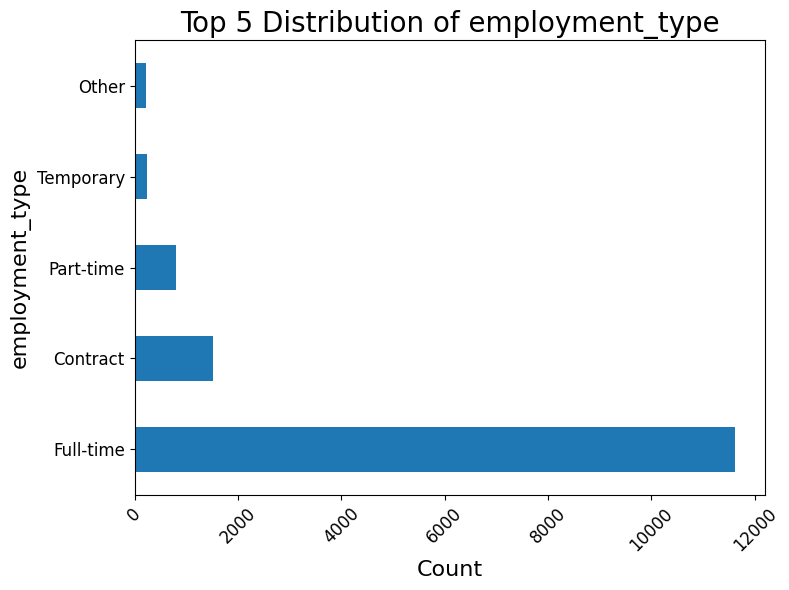

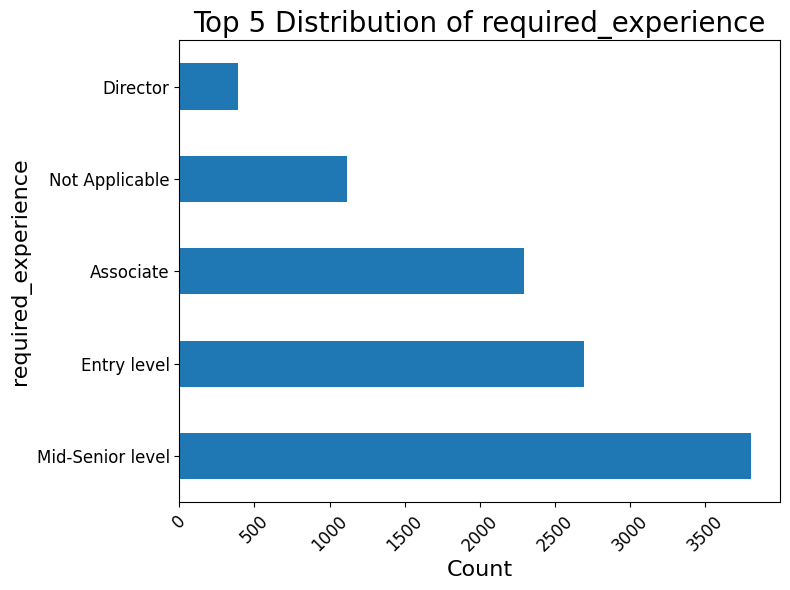

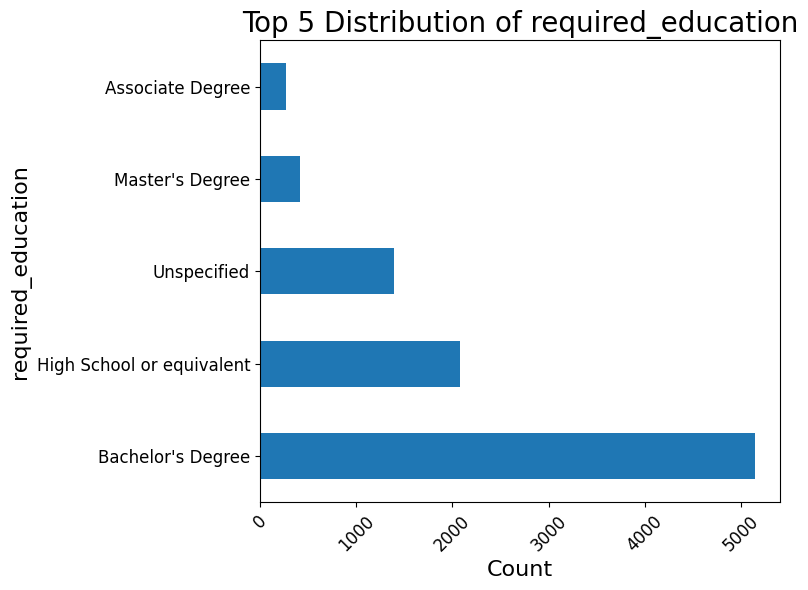

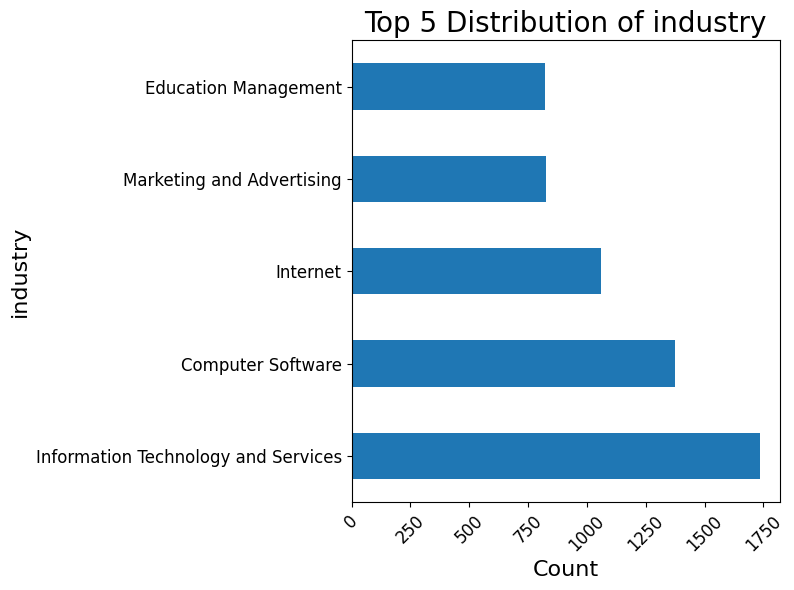

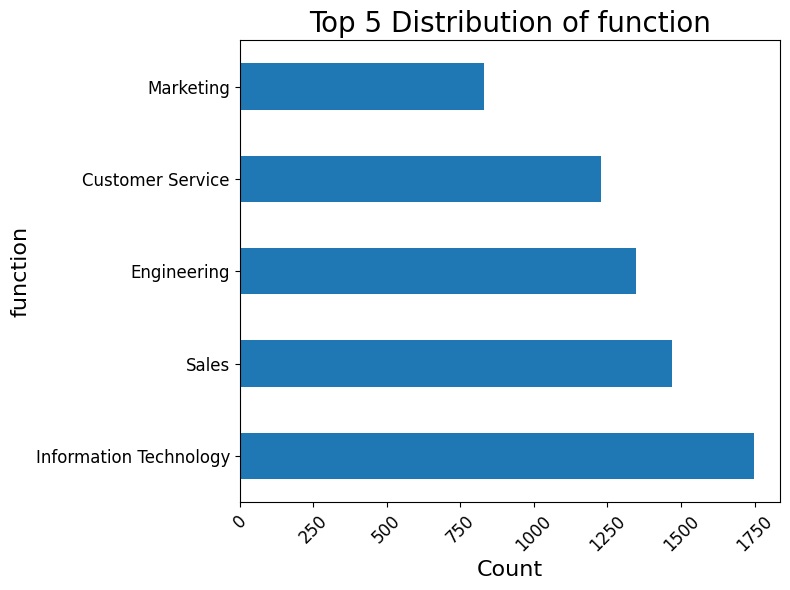

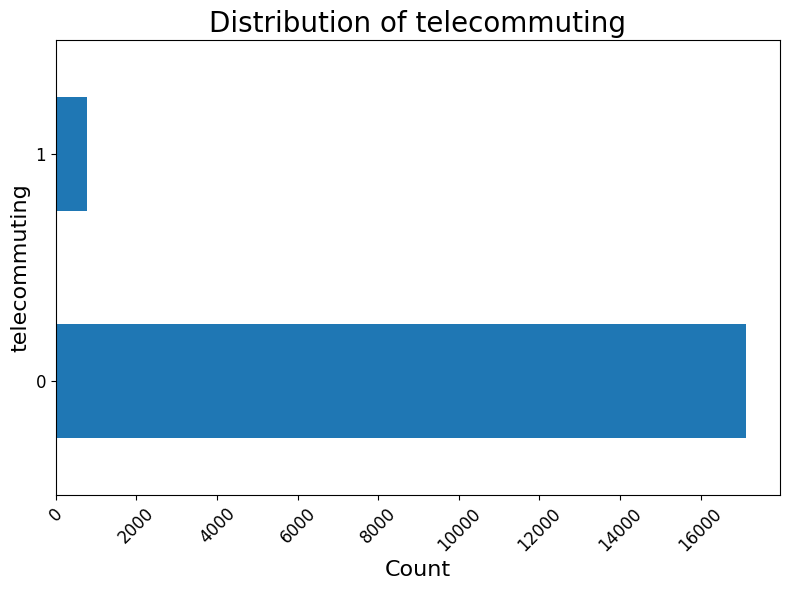

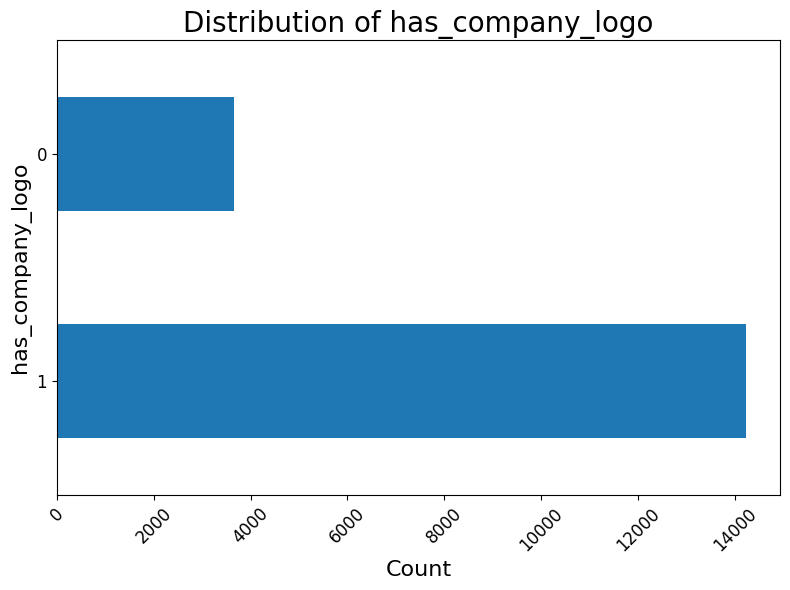

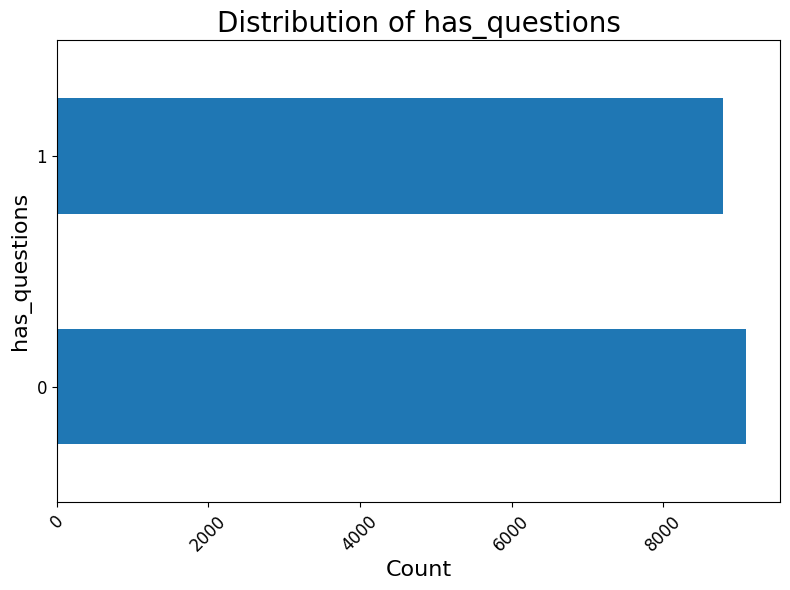

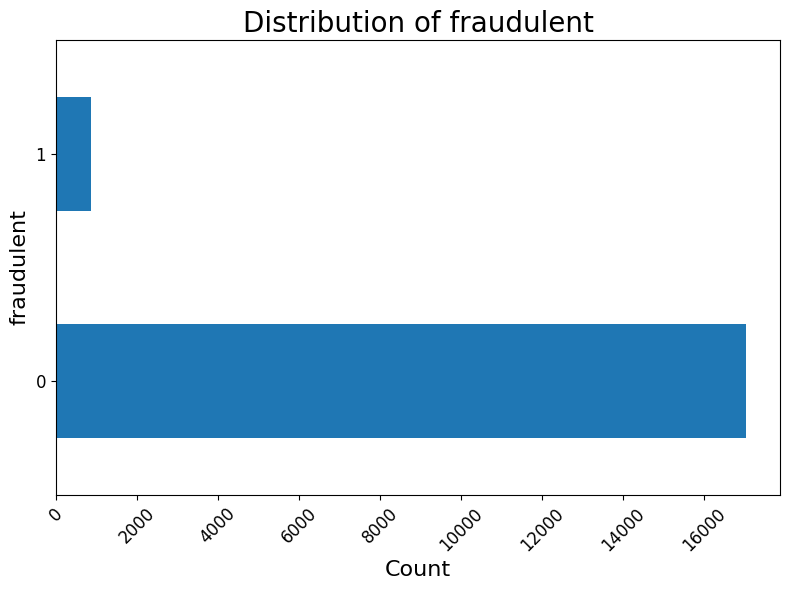

In [9]:
def plot_categorical_distributions(df: pd.DataFrame, columns: list):
    """
    Plot bar charts for categorical columns to show value distributions.

    Args:
        df (pd.DataFrame): The dataset.
        columns (list): List of categorical & binary column names.
    """
    for col in columns:
        try:
            #plt.figure(figsize=(12, 14))
            is_top_5 = False
            if df[col].unique().size > 5:
                # plot top 5 only
                is_top_5 = True
                top_values = df[col].value_counts().nlargest(5).index
                df_temp = df[col].where(df[col].isin(top_values)).dropna()
                df_temp.value_counts(dropna=False).plot(kind='barh')
                plt.title(f'Top 5 Distribution of {col}')
            else:
                df[col].value_counts(dropna=False).plot(kind='barh')
                plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.ylabel(col)
            plt.xticks(rotation=45)
            #plt.yticks(fontsize=6)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            logging.error(f"Failed to plot distribution for {col}: {e}")

# Select categorical and binary columns to visualize
categorical_columns = [
    'employment_type', 'required_experience', 'required_education',
    'industry', 'function', 'telecommuting', 'has_company_logo',
    'has_questions', 'fraudulent'
]

# Plot value distributions
plot_categorical_distributions(df, categorical_columns)

#### Results:
After visualizing our data, we understand that our dataset has class imbalance because we have many more real jobs than fraudulent jobs. We will have to keep this in mind as we build our data science model.

Target Variable: fraudulent

Imbalanced classes:

0 (Real jobs) dominate the dataset.

1 (Fake jobs) are a minority.

We'll need to address this imbalance during modeling (e.g., SMOTE, stratified sampling).

#### Purpose:
This function is designed to visualize the correlation relationships between selected numerical columns in the dataset. It computes the pairwise correlation matrix and plots it as a heatmap, where the strength and direction of the relationships are represented by color intensity. This helps in identifying strong positive or negative correlations between variables, which can inform feature selection, detect multicollinearity, or guide further analysis.

Correlation is a measure that shows the relationship between two variables. It ranges from -1 to +1:

Positive (+1) --> Strong positive correlation - as one goes up, the other also goes up.

Negative (-1) --> Strong negative correlation - as one goes up, the other goes down.

 None (0) --> No correlation - they don't move together in any predictable way.

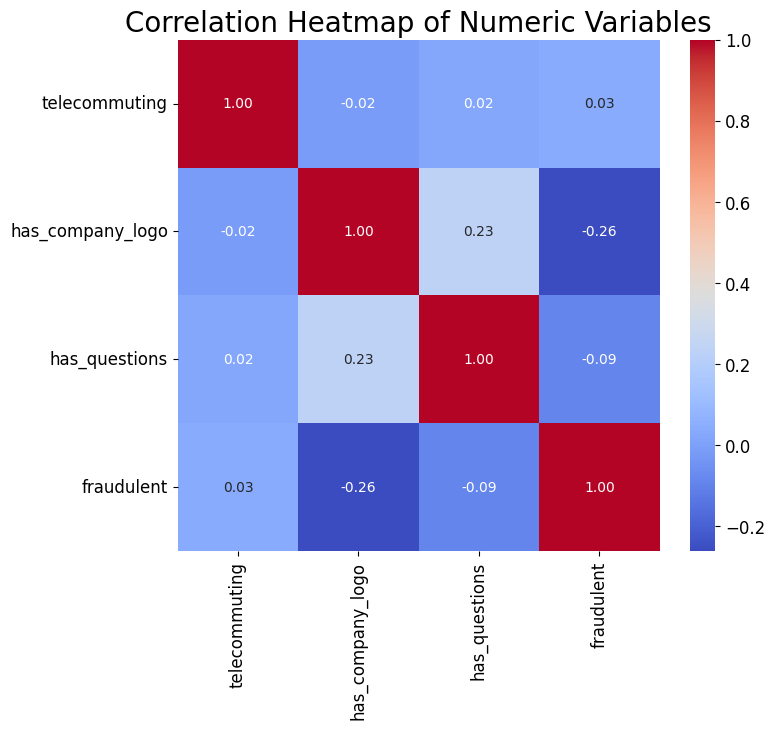

In [10]:
import seaborn as sns

def plot_correlation_heatmap(df: pd.DataFrame, numeric_cols: list):
    """
    Plot a heatmap showing correlation between numerical columns.

    Args:
        Pandas Dataframe (pd.DataFrame): The dataset.
        numeric_cols (list): List of numerical column names.
    """
    try:
        corr_matrix = df[numeric_cols].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
        plt.title('Correlation Heatmap of Numeric Variables')
        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        logging.error(f"Error plotting correlation heatmap: {e}")
        raise

# Define numeric columns
numeric_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']

# Plot correlation heatmap
plot_correlation_heatmap(df, numeric_columns)


#### Results:
1. Field: has_company_logo

    - Correlation with fraudulent: negative

    - Meaning: If a job has a company logo (has_company_logo = 1), it's less likely to be fake

    - So: Fake jobs often don’t have logos → makes sense.

2. Field: has_questions

    - Correlation with fraudulent: positive

    - Meaning: If has_questions = 1 (i.e., the job does have screening questions), it's more likely to be fake

    - But this seems counterintuitive? You'd think real jobs use questions more?


3. Explanation?

The opposite is more likely true in most real-world cases:

Real jobs do include screening questions. Fake jobs tend to skip them, because they want to look easy/appealing.

So, if has_questions has a positive correlation with fraudulent, it might be due to:

    3.1 - Noise or imbalance in the data.

    3.2 - Possible feature encoding error.

    3.3 - Or the correlation is very weak and not meaningful in practice.

Conclusion:

A positive correlation with fraudulent means that as the other variable increases (e.g., has_questions = 1), the likelihood of being fake (fraudulent = 1) also increases.

But correlation only shows association, not causation.



### Step 2: Structuring

Structuring data transforms features to uniform formats, units, and scales.


#### Purpose:
Format text fields in a uniform format

In [11]:
import re

def format_text(text: str) -> str:
  """
  Clean the input text converting to lowercase and removing whitespaces. We will leave non-ascii characters as it could be an indicator of a fraudulent job.
  Args:
      text (str): The input text to be cleaned.

  Returns:
      str: The cleaned text
  """
  if not isinstance(text, str):
      raise ValueError("Input must be a string.")
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)
  return text

  df['description'] = df['description'].apply(format_text)
  df['requirements'] = df['requirements'].apply(format_text)
  df['title'] = df['title'].apply(format_text)
  df['company_profile'] = df['company_profile'].apply(format_text)

#### Results:
Now the text fields we care about for our model are formatted consistently, which will be especially useful when applying TF-IDF. Due to the nature of our dataset we did not have to do too much structuring to it.

### Step 3: Cleaning

Cleaning data removes or replaces missing and outlier data.

#### Purpose:

We saw earlier in a table that we have certain coumns with missing data ordered by percentage, now we either want to drop/filter those columns out of our dataset also because they have poor real-world usability for our Data Science Model.

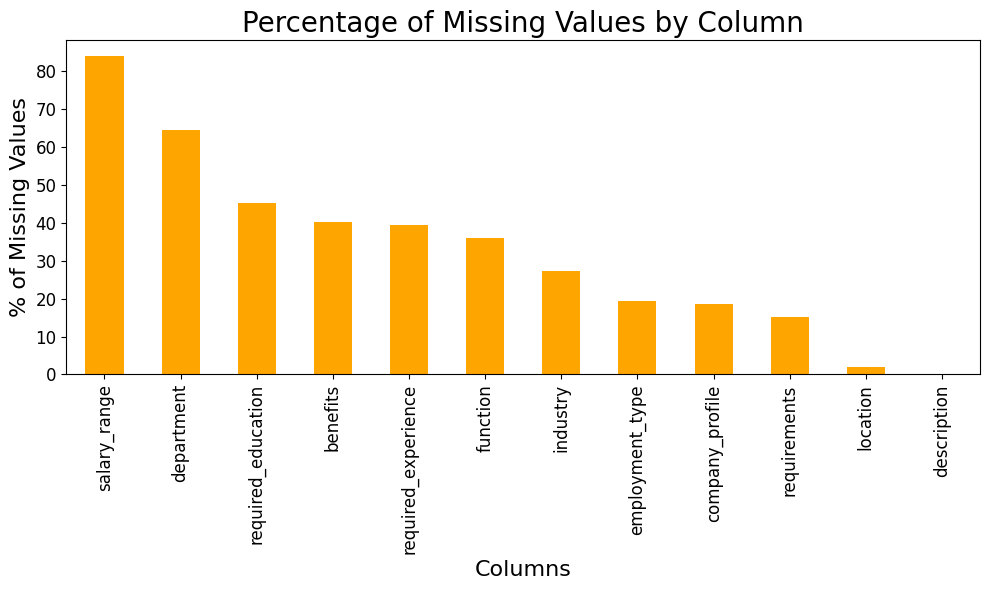

In [12]:
# Count and display percentage of missing values:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_percent.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.show()


#### Results:
We've visualized some of the fields we intend to filter in the coming steps.

#### Purpose:

We want to filter the dataframe to only have our feature and target columns since some of the other fields have too mnay nulls or are not usable for our goals and have poor real-world application.

Features:

  - Text: title, description, requirements, company_profile

  - Structured: employment_type (Categorical), telecommuting (Boolean)

Target:
  - fraudulent

In [13]:
def filter_dataframe(df: pd.DataFrame, required_columns: List[str]) -> pd.DataFrame:
    """
    Filters the input DataFrame to retain only the specified columns, in the given order.

    Parameters
    ----------
    df: pd.DataFrame - The input DataFrame to process.

    required_columns: List[str]
        A list of columns that must be present in the DataFrame. Only these columns will be retained, in this order.

    Returns
    -------
    pd.DataFrame: A new DataFrame containing only the specified columns, in the specified order.

    Raises
    ------
    ValueError: If any of the required columns are missing in the input DataFrame.
    """
    missing = set(required_columns) - set(df.columns)
    if missing:
        raise ValueError(f"Missing required column(s): {', '.join(missing)}")

    return df[required_columns]

required_columns = [
    "job_id",
    "title",
    "description",
    "requirements",
    "company_profile",
    "employment_type",
    "telecommuting",
    "fraudulent"
]

filtered_df = filter_dataframe(df, required_columns)

In [14]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_id           17880 non-null  int64 
 1   title            17880 non-null  object
 2   description      17879 non-null  object
 3   requirements     15184 non-null  object
 4   company_profile  14572 non-null  object
 5   employment_type  14409 non-null  object
 6   telecommuting    17880 non-null  int64 
 7   fraudulent       17880 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


#### Results:

Now we have only our feature and target columns along with the "job_id" field to easily identify a given row.

#### Purpose:
This function is responsible for cleaning the dataset by addressing missing or incomplete data in key text and categorical fields. Specifically, it performs two main operations:

1. Row Removal: It drops rows where all of the major text fields (title, description, requirements, company_profile) are missing, as such records provide no useful information.

2. Value Imputation: It fills missing or blank values in the employment_type column with the placeholder value 'Unknown', ensuring consistent treatment of missing employment data.

This cleaning step improves data quality by removing irrelevant records and standardizing missing values, making the dataset more reliable for analysis and modeling.

In [15]:
def clean_dataset(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the dataset by applying the following transformations:
    1. Drops rows where all four specified text columns are missing (NaN).
    2. Fills missing and empty string values in the 'employment_type' column with 'Unknown'.

    Parameters
    ----------
    df: pd.DataFrame - The input DataFrame to clean.

    Returns
    -------
    pd.DataFrame - A cleaned DataFrame with the specified transformations applied.
    """
    text_columns = ['title', 'description', 'requirements', 'company_profile']
    rows_before = len(df)

    # Drop rows where all text columns are missing:
    df_cleaned = df.dropna(subset=text_columns, how='all')
    rows_after = len(df_cleaned)
    dropped = rows_before - rows_after

    # Fill missing or blank 'employment_type' with 'Unknown':
    df_cleaned['employment_type'] = df_cleaned['employment_type'].apply(lambda x: 'Unknown' if pd.isna(x) or str(x).strip() == '' else x)

    print(f"[INFO] Dropped {dropped} rows with all text fields missing.")
    print(f"[INFO] Filled 'employment_type' blanks and NaNs with 'Unknown'.")

    return df_cleaned

# Supply the filtered dataframe from the previous step:
cleaned_df = clean_dataset(filtered_df)

[INFO] Dropped 0 rows with all text fields missing.
[INFO] Filled 'employment_type' blanks and NaNs with 'Unknown'.


#### Results:
We now have our cleaned dataframe and can continue with the next steps.

### Step 4: Enriching

Enriching data derives new features from existing features and appends new data from external sources.

#### Purpose
We will add metadata around the description feature as it is our main text feature.  Specifically, we are looking to add word count, readability using the flesch reading ease score, and complexity score using the text standard in textstat as these can all be an indicator of fraud.

In [16]:
import textstat

cleaned_df[f'description_wordcount'] = cleaned_df['description'].astype(str).apply(lambda x: len(x.split()))
cleaned_df[f'description_readability'] = cleaned_df['description'].astype(str).apply(textstat.flesch_reading_ease).fillna(0).astype(float)
cleaned_df['description_complexity_score'] = cleaned_df['description'].astype(str).apply(lambda x: textstat.text_standard(x, float_output=True)).fillna(0).astype(float)
cleaned_df[f'company_profile_wordcount'] = cleaned_df['company_profile'].astype(str).apply(lambda x: len(x.split()))
cleaned_df[f'company_profile_readability'] = cleaned_df['company_profile'].astype(str).apply(textstat.flesch_reading_ease).fillna(0).astype(float)
cleaned_df['company_profile_complexity_score'] = cleaned_df['company_profile'].astype(str).apply(lambda x: textstat.text_standard(x, float_output=True)).fillna(0).astype(float)

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   job_id                            17880 non-null  int64  
 1   title                             17880 non-null  object 
 2   description                       17879 non-null  object 
 3   requirements                      15184 non-null  object 
 4   company_profile                   14572 non-null  object 
 5   employment_type                   17880 non-null  object 
 6   telecommuting                     17880 non-null  int64  
 7   fraudulent                        17880 non-null  int64  
 8   description_wordcount             17880 non-null  int64  
 9   description_readability           17880 non-null  float64
 10  description_complexity_score      17880 non-null  float64
 11  company_profile_wordcount         17880 non-null  int64  
 12  comp

#### Result
We now have 13 features in our dataset, including key metadata about description and company_profile features.

### Step 5: Validating

Validating data verifies that the dataset is internally consistent and accurate.

#### Purpose
First, we will verify that our boolean-type features have only 0 and 1 for values.

In [17]:
cleaned_df[['fraudulent', 'telecommuting']].value_counts()

fraudulent  telecommuting
0           0                16311
1           0                  802
0           1                  703
1           1                   64
Name: count, dtype: int64

#### Results
We can see that only valid values of 0 and 1 exist in fraudulent and telecommuting features.

### Step 6: Publishing

Now that we have completed our initial data wrangling, we can save our cleaned dataset in a git repository, upload it to Kaggle, or submit our final findings to the original dataset.  This will allow others to benefit and learn from the modificaiton we have done to the original dataset.

***GitHub Repo for Project Fake Finder: https://github.com/jdeleon3/Projects.RealFakeJobPredictor***

In [18]:
# import os
# if os.path.exists('./data'):
#     cleaned_df.to_csv('./data/cleaned_job_postings.csv', index=False)
#     print("Cleaned dataset saved as 'cleaned_job_postings.csv'.")

## Data Exploration

### Step 1: Understand the data

Find the size of the dataset (number of rows and columns), identify and categorize the features (categorical, numerical).

### Purpose
Now that we have a cleaned dataset, we should again evaluate what our dataset looks like, starting with it's shape and the type of features included.

In [19]:
print(f"{cleaned_df.shape[0]} rows and {cleaned_df.shape[1]} columns after cleaning.")

numeric_columns = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()
text_columns = cleaned_df.select_dtypes(include=[object]).columns.tolist()

print(f"{len(numeric_columns)} Numeric columns: {numeric_columns}")
print(f"{len(text_columns)} Text columns: {text_columns}")

17880 rows and 14 columns after cleaning.
9 Numeric columns: ['job_id', 'telecommuting', 'fraudulent', 'description_wordcount', 'description_readability', 'description_complexity_score', 'company_profile_wordcount', 'company_profile_readability', 'company_profile_complexity_score']
5 Text columns: ['title', 'description', 'requirements', 'company_profile', 'employment_type']


#### Results
After cleaning our dataset, we have 17880 row and 13 features (8 numeric and 5 text).

#### Purpose
Part of understanding our data is looking for features that have an imbalance in values. The employment_type feature could be one of those features, as most job postings tend to be Full-time.

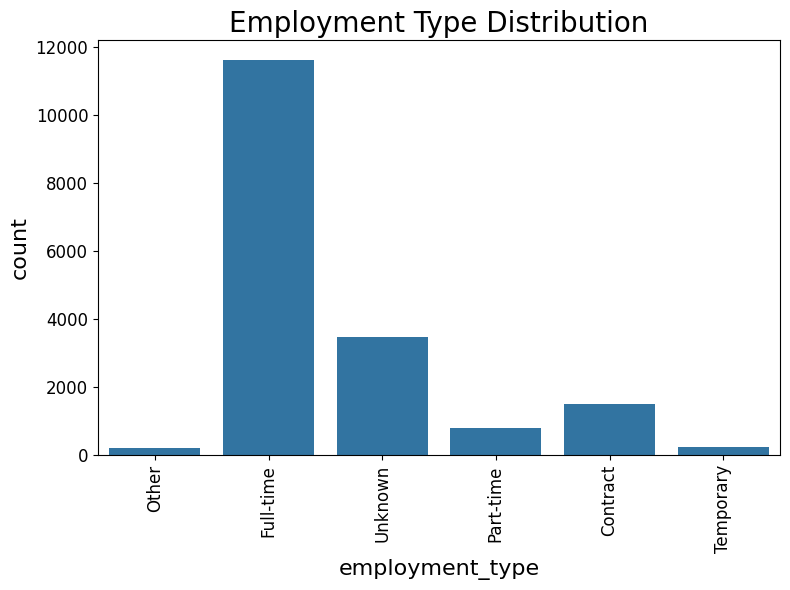

In [20]:
sns.countplot(cleaned_df, x='employment_type')
plt.title('Employment Type Distribution')
plt.xticks(rotation=90)
plt.show()

#### Results
As expected, Full-time does have considerably more than all other types.  We might consider combining some types if we find employment_type being overfit by the model, but for now, we will leave it as is.

### Step 2: Identify relationships between features

Find the direction (positive, negative) and strength (strong, moderate, weak) of correlation between the features.

#### Purpose
Next, we will verify that we do not have any highly coorelated features that can be combined.  We will consider correlation values over 0.7 as candidates.  To do this, we will look at a heatmap of the dataset features.

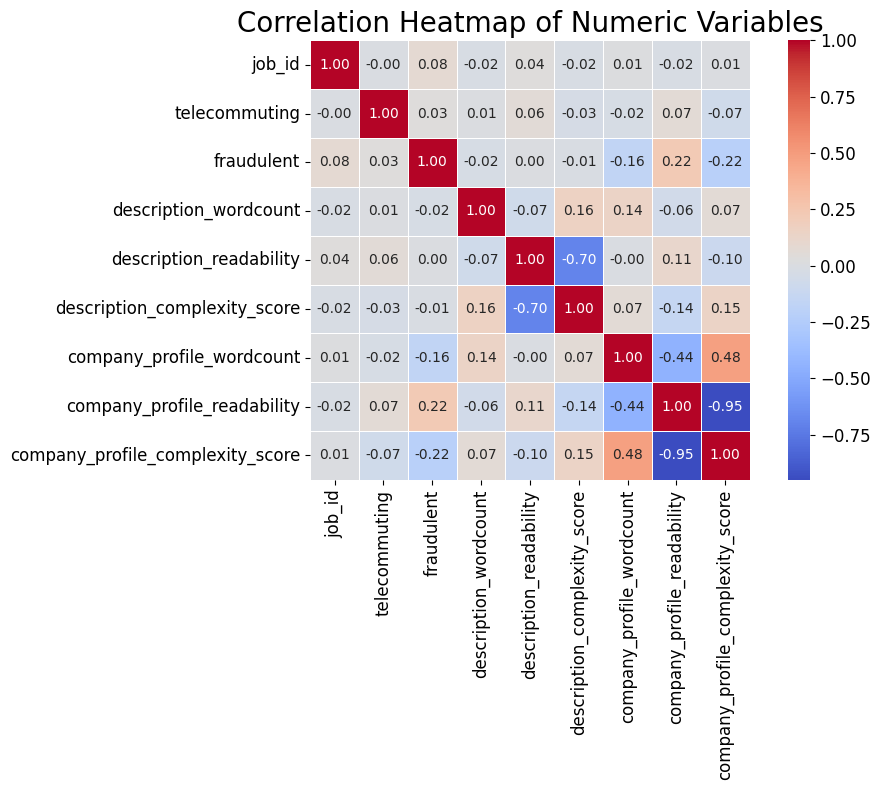

In [21]:
corr_matrix = cleaned_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#cleaned_df.drop(columns=['descriptioin_complexity_score', 'company_profile_complexity_score'], inplace=True, errors='ignore')

#### Results
We found that the readability features created during our Enriching step is negatively correlated with the complexity score feature.  Since the correlation is above 0.70, we should be mindful of using company_profile_complexity_score and descriptioin_complexity_score features in our model as it could introduce some bias.

### Step 3: Describe the Data

Determine the shape of the distribution (symmetric, skewed)

#### Purpose
We will review the histogram plots of our engineered features to check their distribution.

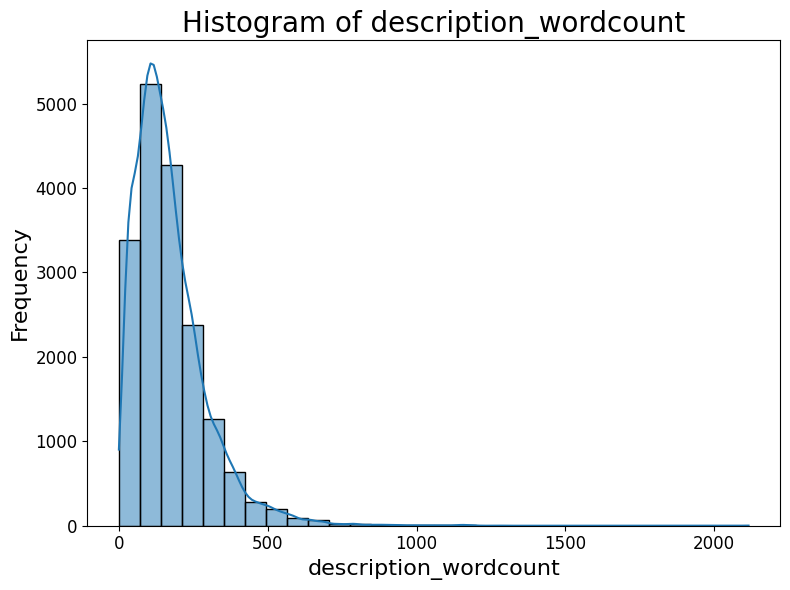

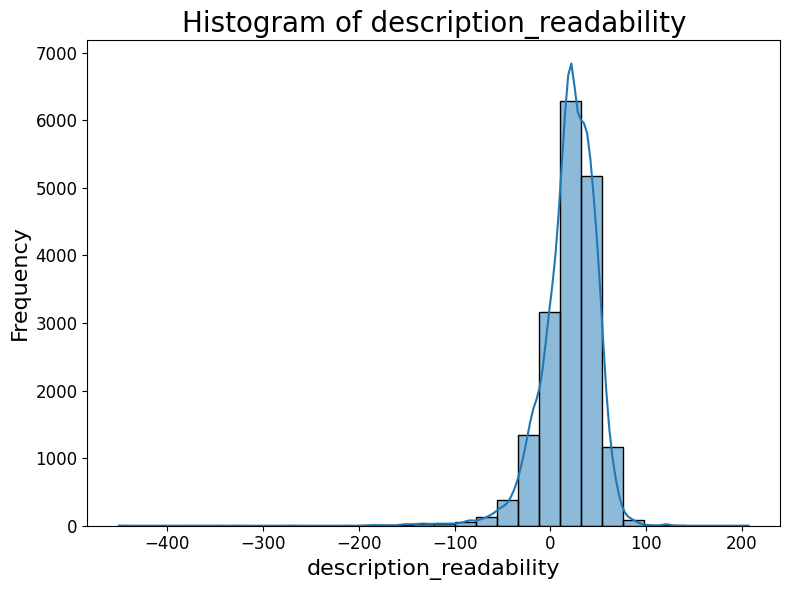

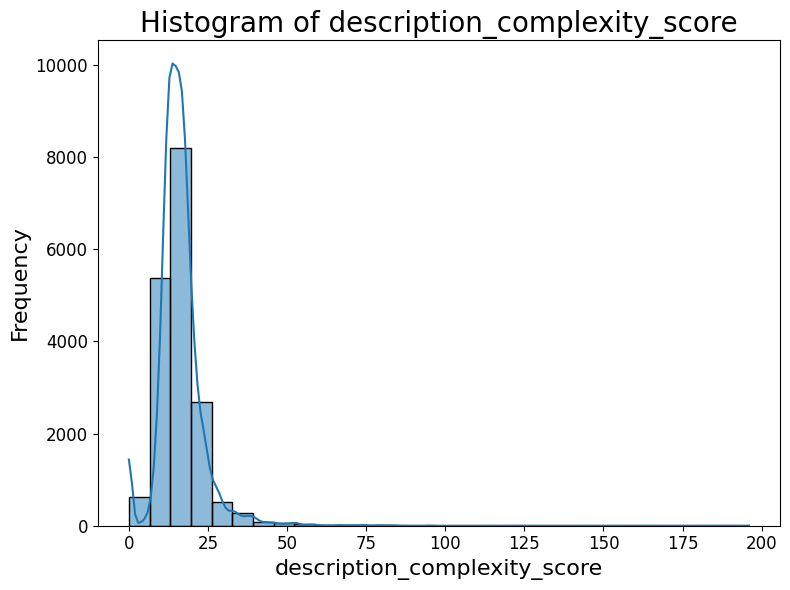

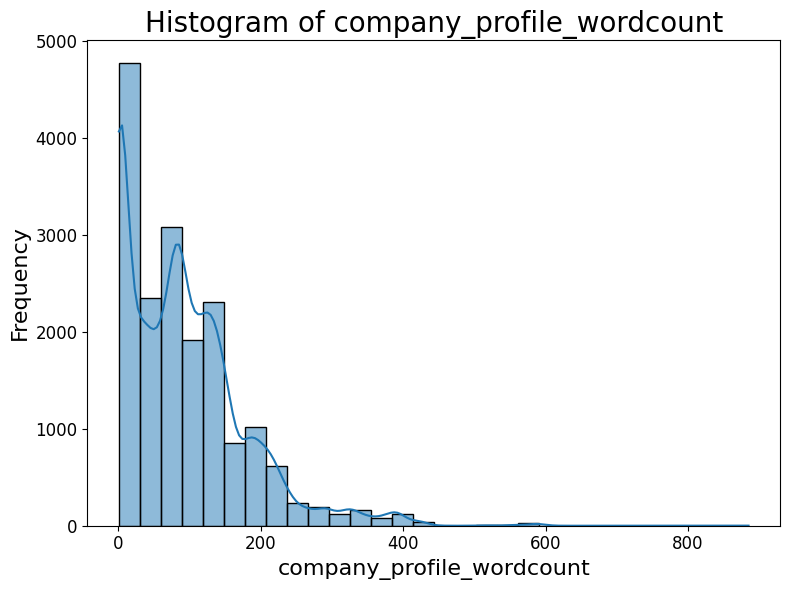

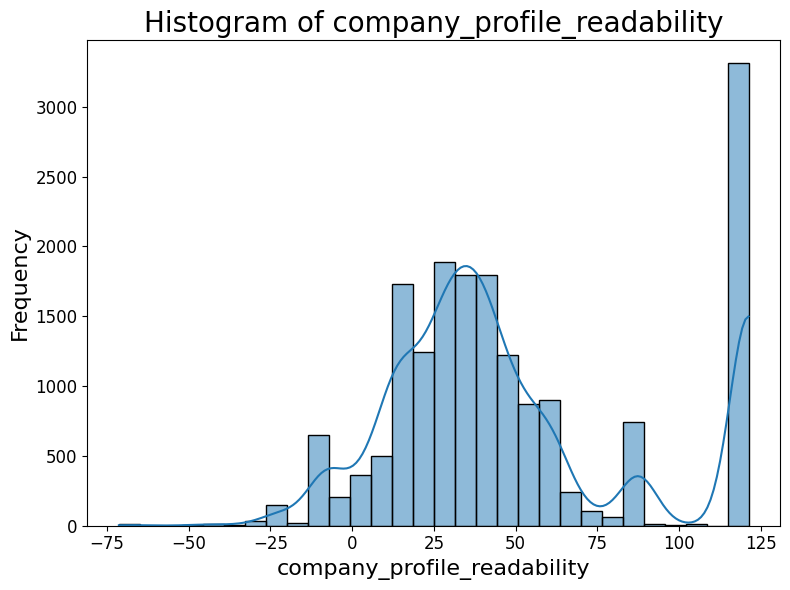

In [22]:
numeric_columns = ['description_wordcount', 'description_readability', 'description_complexity_score', 'company_profile_wordcount', 'company_profile_readability']

for col in numeric_columns:
    sns.histplot(cleaned_df[col], bins=30, kde=True)    
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Results
Each of the features are skewed.  Description_wordcount, company_profile_wordcount, and description_complexity_score are all skewed right with a long tail while company_profile_readability and description_readability are skewed left with a long tail.  This warrants further analysis to consider outliers.

### Step 4: Detect outliers and missing data

Find values that are much higher or lower than the rest of the data or values that strongly affect the shape of the data.

#### Purpose
With our engineered features being skewed, we will look at the boxplot of each to identify if there are any outliers that should be addressed.

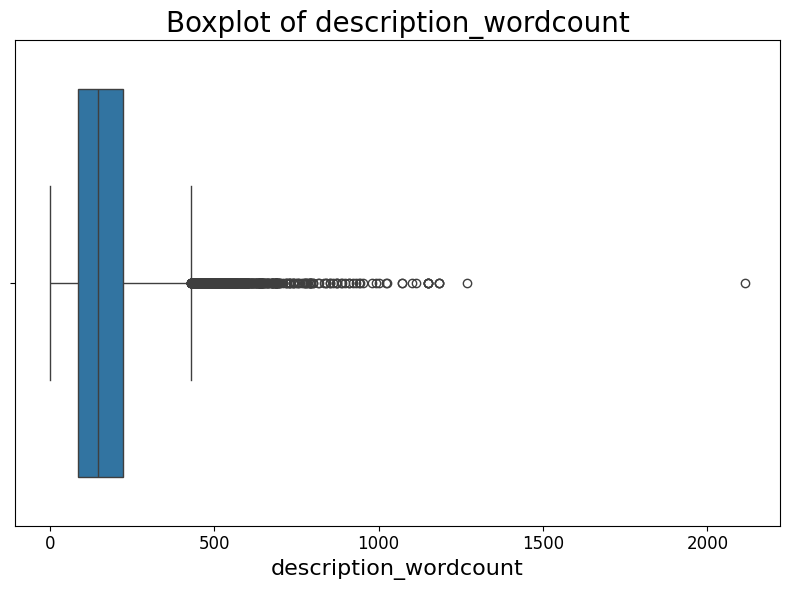

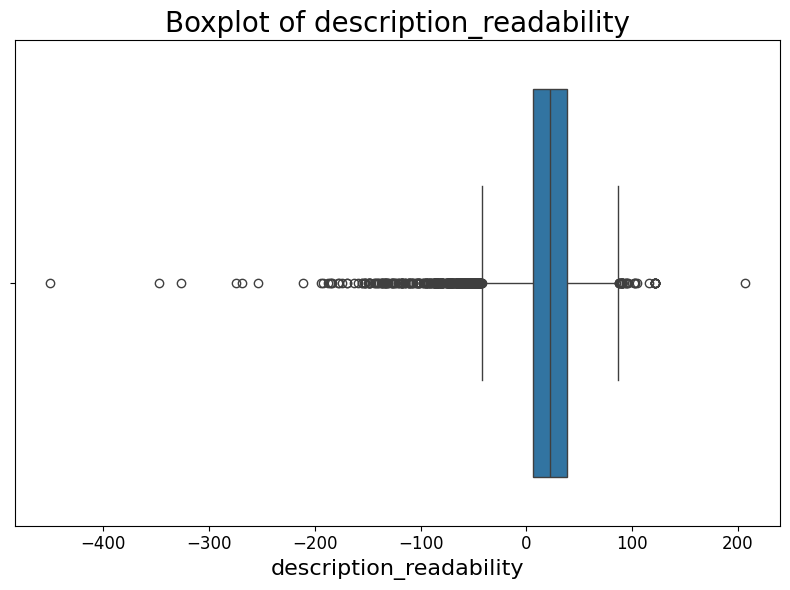

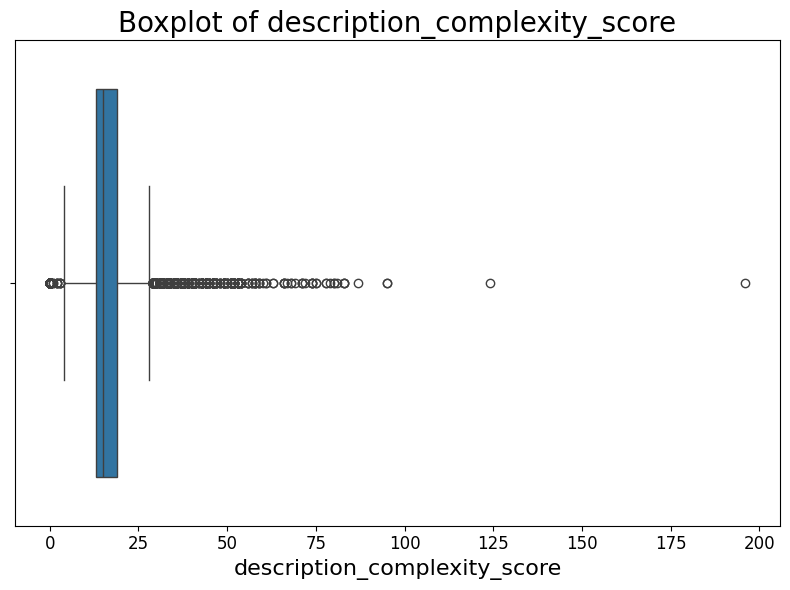

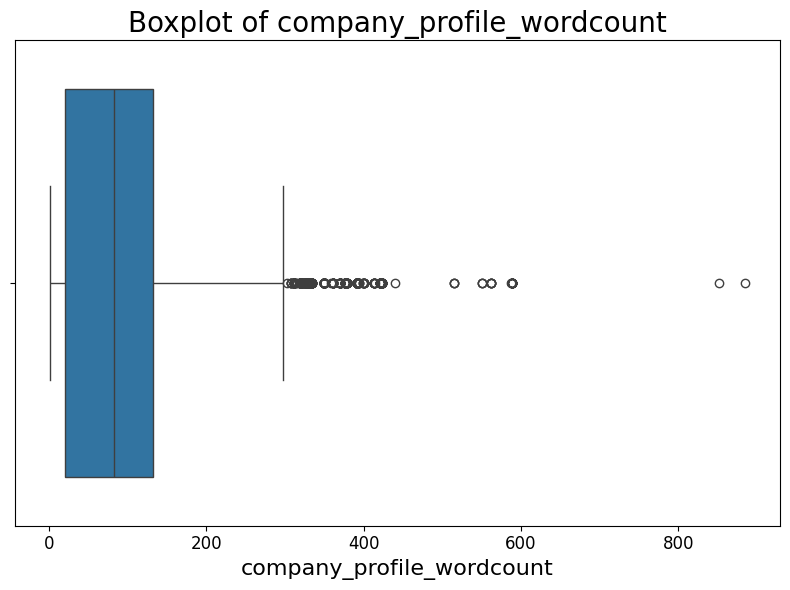

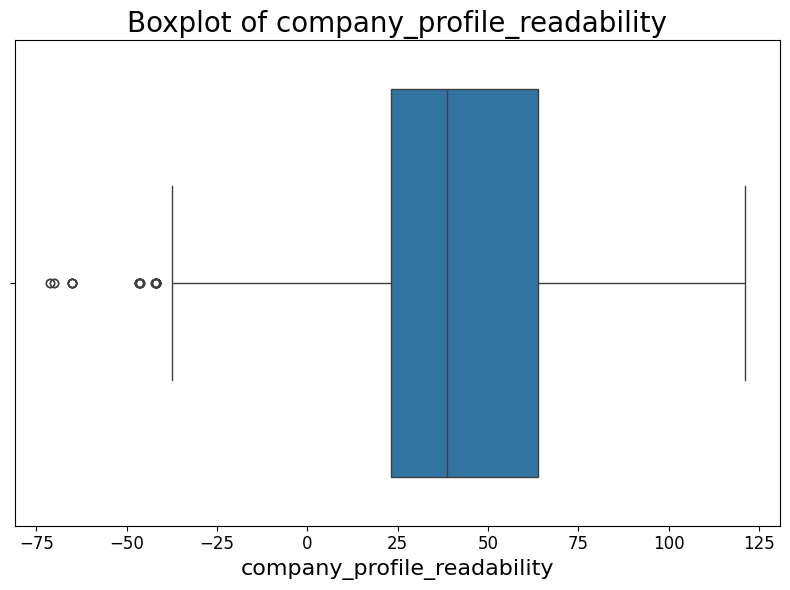

In [23]:
for col in numeric_columns:
    sns.boxplot(data=cleaned_df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#### Results
We can see that each of our engineered features have quite a few potential outliers.  As outliers could be a signal for fraud, we do not want to completely remove our outliers.

#### Purpose
Since we have a number of outliers that could affect the results of some models, such as regression models, we will add additional features that cap values at the q1 and q3 values of each feature.  We will review the histogram of each of the new capped features to ensure that the overall data is still consistent with the uncapped.

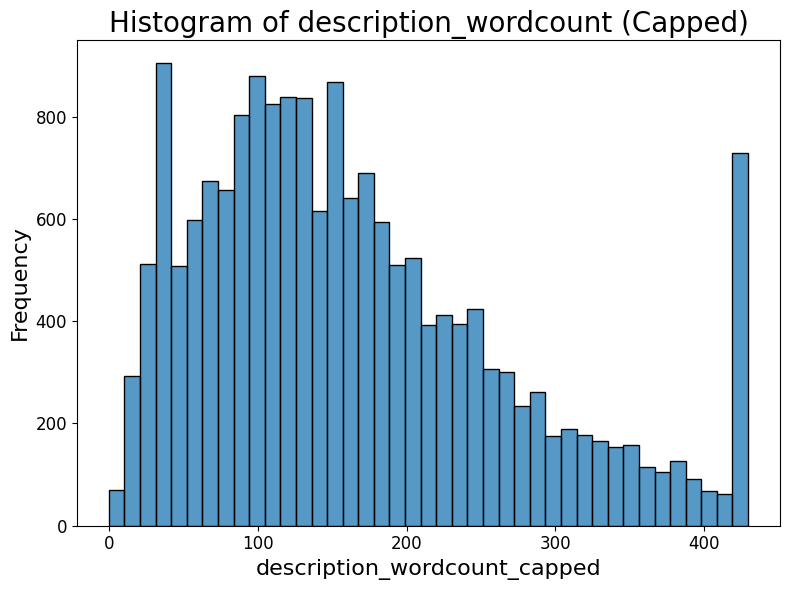

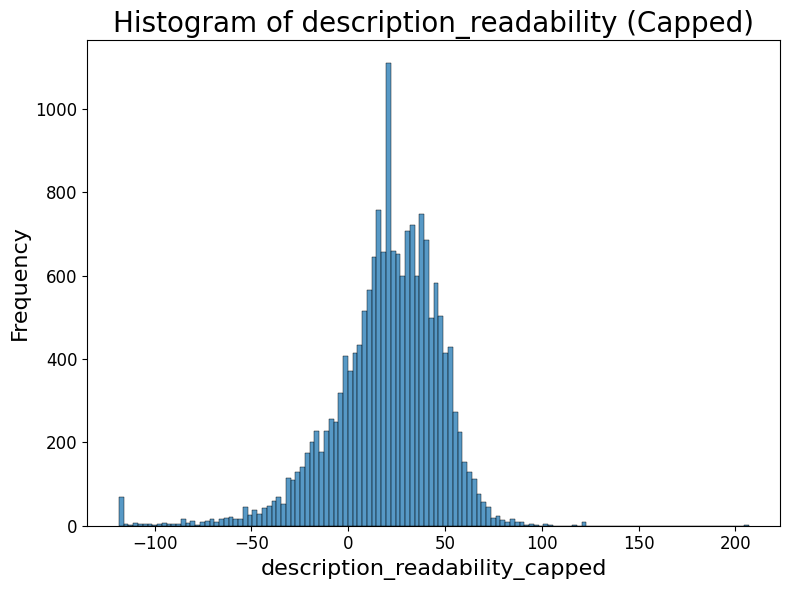

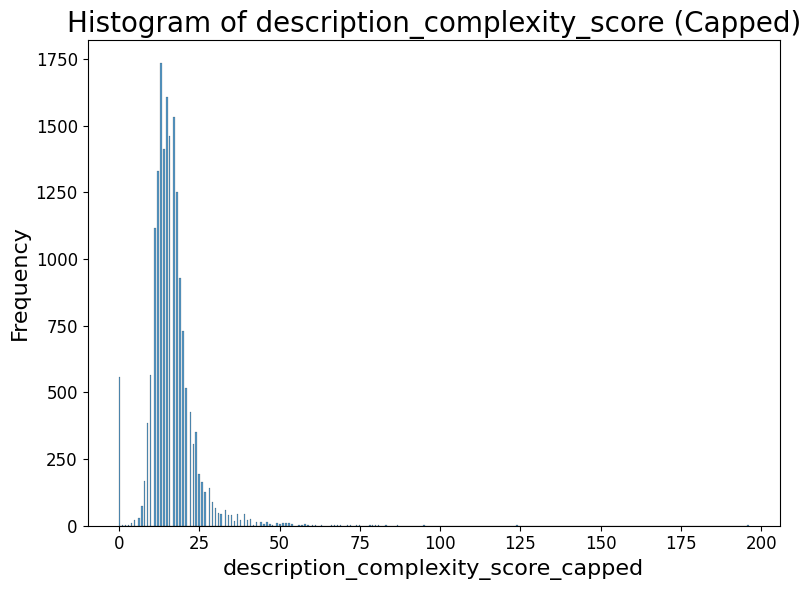

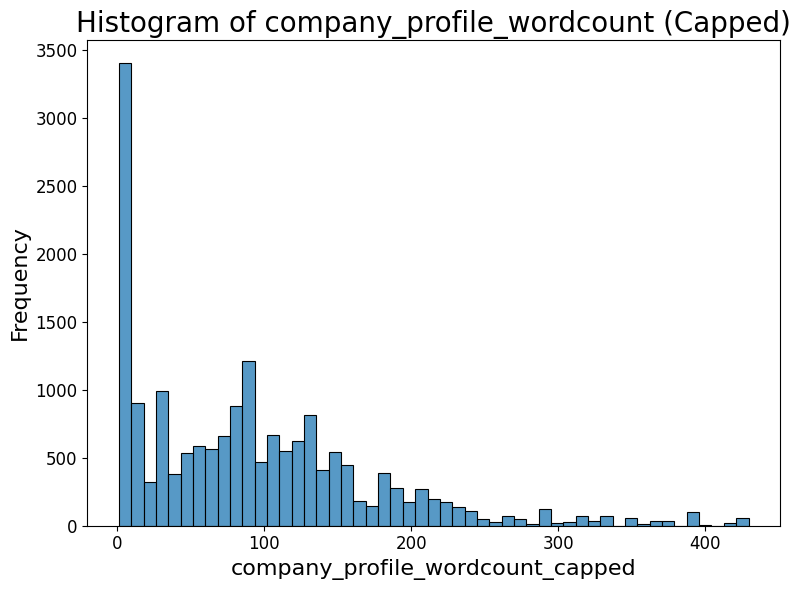

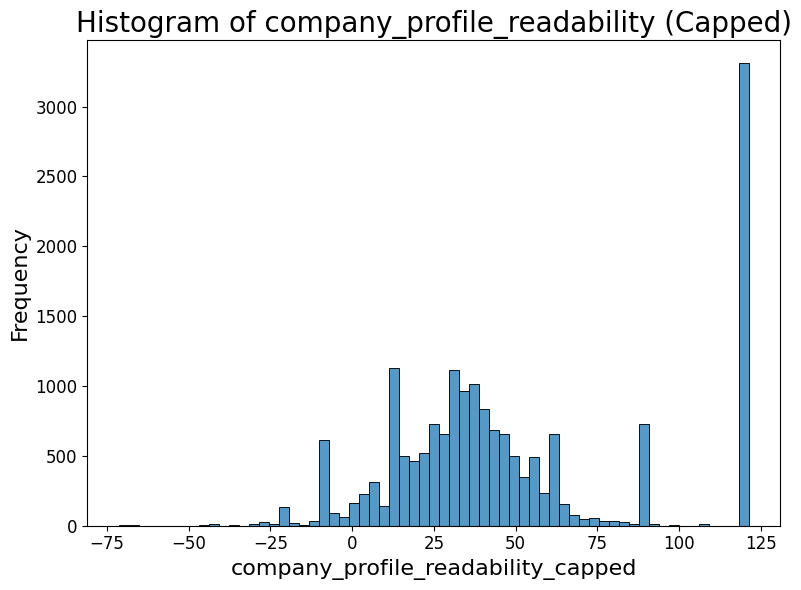

In [24]:
for col in numeric_columns:
    q1 = cleaned_df['description_wordcount'].quantile(0.25)
    q3 = cleaned_df['description_wordcount'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleaned_df[f'{col}_capped'] = cleaned_df[col].clip(lower=lower_bound, upper=upper_bound)
    sns.histplot(data=cleaned_df, x=f'{col}_capped')
    plt.title(f'Histogram of {col} (Capped)')
    plt.xlabel(f'{col}_capped')
    plt.ylabel('Frequency')
    plt.show()



#### Results
As we can see, the histograms are still similarly shapped as the uncapped histograms with values more suitable for regression models.  With models that are sensitive to outliers, we can use 'description_wordcount_capped', 'description_readability_capped', 'description_complexity_score_capped', 'company_profile_wordcount_capped', and 'company_profile_readability_capped'.  For models less sensitive to outliers, we can use the original data.

### Data Exploratory Data Analysis Summary
Now that we have done a thorough analysis and exploration of our dataset, we are finally ready to start to apply models.  We have deffered applying TF-IDF to our categorical features such as company_profile and description until we get to more advanced models.

# Regression Models

## Balancing The Dataset
Before we get started, we need to balance our dataset, as the fraudulent case has a considerably smaller count than the non-fraudulent case.  Without addressing this, we will have a bias toward non-fraudulent.

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def  split_dataset(cols: List[str], target: str, df: pd.DataFrame, perform_resample: bool=False, perform_scale_x: bool=True, perform_scale_y: bool = False) -> tuple:
        
    X = df[cols].values.reshape(-1, len(cols))
    y = df[target].values.reshape(-1, 1)
    if perform_resample:
        # Resample the dataset using SMOTE
        ros = SMOTE(sampling_strategy='auto', random_state=42)
        X, y = ros.fit_resample(X, y)
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
    if perform_scale_x:
        # Scale the features using min-max scaling
        scaler = MinMaxScaler()
        XTrain = scaler.fit_transform(XTrain)
        XTest = scaler.transform(XTest)
    if perform_scale_y:
        # Scale the target variable using min-max scaling
        scaler = MinMaxScaler()
        yTrain = scaler.fit_transform(yTrain)
        yTest = scaler.transform(yTest)
    return XTrain, XTest, yTrain, yTest


## Linear Regression - 2 Features

Identify two attributes in the consumable usage dataset and develop a linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.

#### Purpose: 
First, perform a linear regression with company_profile_complexity_score against company_profile_readability.  In our correlation matrix, these showed to have a strong correlation.

We will plot the scatter plot and regression line to visualize the regression.

Text(0, 0.5, 'Company Profile Readability')

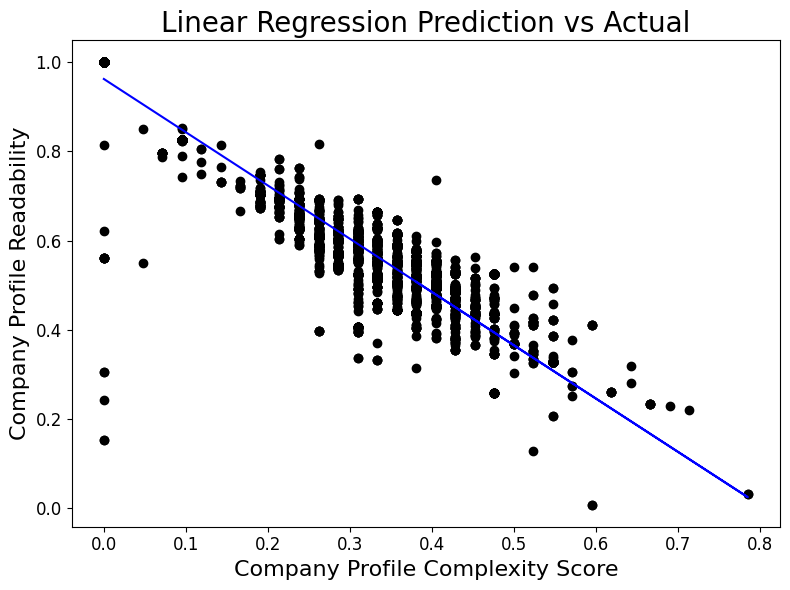

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

# Split the dataset into features and target variable
XTrain, XTest, yTrain, yTest = split_dataset(cols=['company_profile_complexity_score'],
                                            target='company_profile_readability',
                                            df=cleaned_df,
                                            perform_scale_y=True
                                        )

# Create a Linear Regression model
line_regress_2f = LinearRegression()
line_regress_2f.fit(XTrain, yTrain)

#predict the target variable using the test set
y_pred = line_regress_2f.predict(XTest)

#plot the results
plt.scatter(XTest, yTest, color='black', label='Actual')
plt.plot(XTest, y_pred, color='blue', label='Predicted')
plt.title('Linear Regression Prediction vs Actual')
plt.xlabel('Company Profile Complexity Score')
plt.ylabel('Company Profile Readability')

### Results
Overall, we can see that the Company Profile Complexity Score has a nice linear relationship with Company Profile Readability, with some outliers with Complexity Score of 0.

#### Model Performance

#### Purpose
To measure the Performance of our Linear Regression model, we will calculate the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(f"Mean Absolute Error: {mean_absolute_error(yTest, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(yTest, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(yTest, y_pred))}")


Mean Absolute Error: 0.04649889005386675
Mean Squared Error: 0.004322601283785312
Root Mean Squared Error: 0.06574649255880737


#### Results:
A Mean Absolute Error of 0.046 indicates that the model had predictions that were very close to the actual value.  

A Root Mean Squared Error of 0.0657 supports that the predictions were close to the actual value, with typical errors being small.

#### Purpose:
To evaluate the performance of linear regression model against our features in the dataset, we will use K-Fold Cross Validation.

In [28]:
from sklearn.model_selection import cross_val_score

ten_fold_score = -cross_val_score(line_regress_2f, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error')
print(f"Mean Squared Error: {ten_fold_score.mean()}")

Mean Squared Error: 0.0041776032552393065


#### Results:
Performing Cross Validation using the Negative Mean Squared Error scoring also suggests that company_profile_complexity_score and company_profile_readability are well fit for a linear regression relationship.

## Linear Regression - More Than 2 Features

Identify more than two attributes in the consumable usage dataset and develop a multiple linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using mplot3d to show the observed and the predicted values.

#### Purpose:
With there being multiple engineered features related to the Company Profile feature, it is worth evaluating linear regression including each of those features.  In this case, we will perform Linear regression with company_profile_complexity_score and company_profile_wordcount against company_profile_readability.  We will create a 3D plot to visualize the regression as a surface.  

*Note: We are taking 100 random samples from our Test set to plot as a representation of the full dataset for as a performance consideration.*

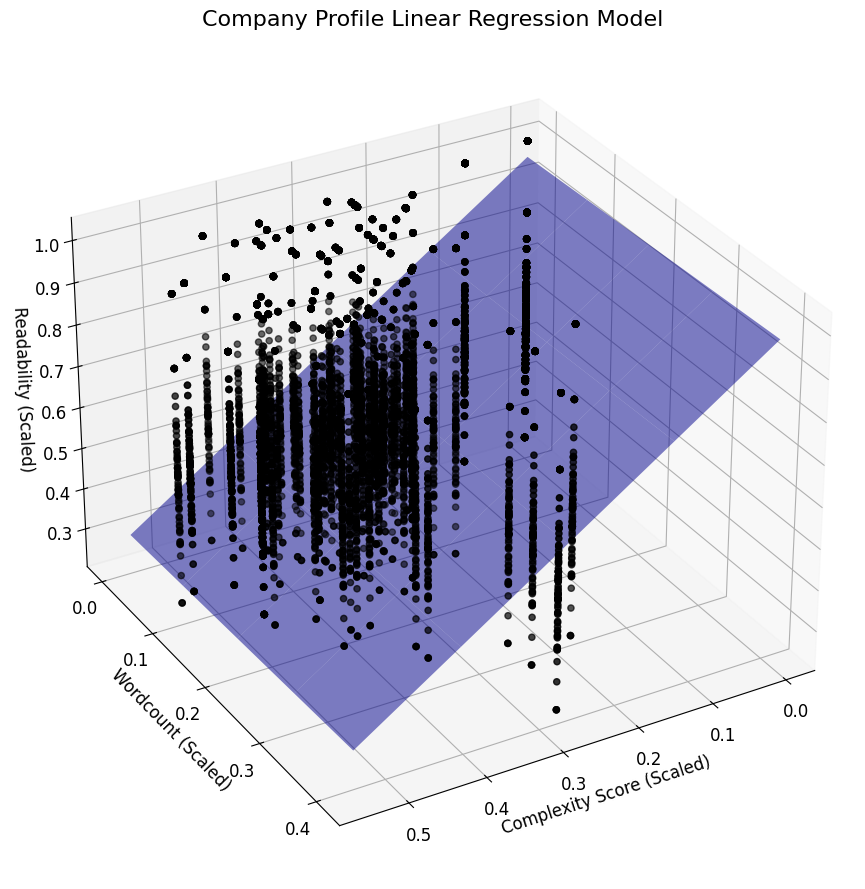

In [29]:
XTrain, XTest, yTrain, yTest = split_dataset(['company_profile_complexity_score', 'company_profile_wordcount'], 'company_profile_readability', cleaned_df, perform_scale_y=True)
line_regress = LinearRegression()
line_regress.fit(XTrain, yTrain)

y_pred = line_regress.predict(XTest)

fig = plt.figure(figsize=(12, 9))
#fig.tight_layout()
ax = fig.add_subplot(111, projection='3d')

sample_indices = np.random.choice(XTest.shape[0], size=100, replace=False)
XTest_sample = XTest[sample_indices]
yTest_sample = yTest[sample_indices]

ax.scatter3D(XTest_sample[:, 0], XTest_sample[:, 1], yTest_sample, color='black')

xDeltaComplexity, xDeltaWordcount = np.meshgrid(np.linspace(XTest_sample[:, 0].min(), XTest_sample[:, 0].max(), 5),
                                                 np.linspace(XTest_sample[:, 1].min(), XTest_sample[:, 1].max(), 5))
yDelta = (line_regress.intercept_[0] +
            line_regress.coef_[0][0] * xDeltaComplexity +
            line_regress.coef_[0][1] * xDeltaWordcount)
ax.plot_surface(xDeltaComplexity, xDeltaWordcount, yDelta, alpha=0.5, color='blue')
ax.set_xlabel('Complexity Score (Scaled)', fontsize=12)
ax.set_ylabel('Wordcount (Scaled)', fontsize=12)
ax.set_zlabel('Readability (Scaled)', fontsize=12)
ax.set_title('Company Profile Linear Regression Model', fontsize=16)
ax.view_init(30, 60)
plt.show()

#### Results:
From looking at the plot, our plan appears to have a nice fit to our plotted points.

#### Model Performance

#### Purpose
To evaluate the model's performance, we will again look at mean squared error, root mean squared error, and mean absolute error.

In [30]:
print(f"Mean Absolute Error: {mean_absolute_error(yTest, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(yTest, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(yTest, y_pred))}")

Mean Absolute Error: 0.04656671506925971
Mean Squared Error: 0.0043142053721662525
Root Mean Squared Error: 0.06568261088116285


#### Results:
The results once again show that our model closely predicted company_profile_readability with minimal errors.

#### Purpose:
To evaluate the performance of linear regression model against our features in the dataset, we will use K-Fold Cross Validation.

In [31]:
from sklearn.model_selection import cross_val_score
ten_fold_score = -cross_val_score(line_regress, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error')
print(f"Mean Squared Error: {ten_fold_score.mean()}")

Mean Squared Error: 0.004165820163559269


#### Results:
When using K-Fold Cross Validation, we can see that it is inconsistent with the performance metrics we initially used.  This suggests that our model is likely over=fitted to our dataset and implies that company_profile_wordcount does not have a linear relationship with company_profile_readability.

### Model Comparision

To compare the Linear Regression with 2 features and Linear Regression with More than 2 Features, I've compiled the following comparison chart:

|                                                | 2 Feature Linear Regression| 2+ Feature Linear Regression|
|------------------------------------------------|----------------------------|-----------------------------|
|**Mean Absolute Error**                         |0.04649889005386675         |0.04656671506925971          |
|**Mean Squared Error**                          |0.004322601283785312        |0.0043142053721662525        |
|**Root Mean Squared Error**                     |0.06574649255880737         |0.06568261088116285          |
|**Mean Squared Error (K-Fold Cross Validation)**|0.0041776032552393065       |0.20055559333302764          |

Comparing the Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error between the 2 models, it would appear that both of the models were great fits with a strong linear fit.  

However, when you review the Mean Squared Error using K-Fold Cross Validation, we can see that the 2 Feature Linear Regression model is truly a good fit while the 2+ Linear Regression model is likely overfit to the data.  The most likely cause of this is the addition of company_profile_wordcount greatly impacted the performance of the linear regression fit.

From this, we know that when we start to look at predicting Fraudulent or Non-Fraudulent with our Logistic Regression model in the next section, we would want to avoid using company_profile_complexity_score and company_profile_readability, as they have a strong linear relationship that could introduce additional bias.  company_profile_wordcount does not appear to have a linear relationship with company_profile_readability.

*Note: We are not including Logistic Regression in our comparison as it will be used to evaluate predictions of Fraudulent or Non-Fraudulent*

## Logistic Regression

Develop a logistic regression model among some identified attributes in the consumable usage dataset and sklearn.linear_model.LogisticRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.

#### Purpose:
Having done linear regression with company_profile_readability, we will now perform a Logistic Regression using company_profile_readability to predict fraudulent class.

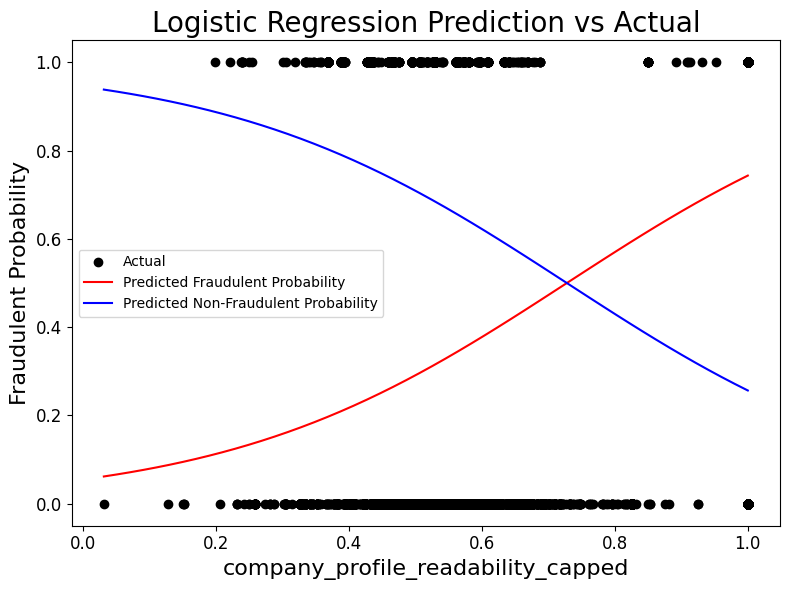

In [32]:
from sklearn.linear_model import LogisticRegression

XTrain, XTest, yTrain, yTest = split_dataset(['company_profile_readability_capped'], 'fraudulent', cleaned_df, perform_resample=True)

log_regress = LogisticRegression()
log_regress.fit(XTrain, yTrain)
y_pred = log_regress.predict(XTest)
y_hat = log_regress.predict_proba(XTest)

xDelta = np.linspace(np.min(XTest), np.max(XTest)).reshape(-1, 1)
yDelta = log_regress.predict_proba(xDelta)

plt.scatter(XTest, yTest, color='black', label='Actual')
plt.plot(xDelta, yDelta[:, 1], color='red', label='Predicted Fraudulent Probability')
plt.plot(xDelta, yDelta[:, 0], color='blue', label='Predicted Non-Fraudulent Probability')
plt.legend()
plt.title('Logistic Regression Prediction vs Actual')
plt.xlabel('company_profile_readability_capped')
plt.ylabel('Fraudulent Probability')
plt.show()


#### Results
Looking at the Prediction vs Actual graph, we can see that our model predominately classified a Job posting with more difficult readability as Non-Fraudulent.  Readabilities that were Easy or Very Easy were generally classified as Fraudulent.

#### Model Performance

#### Purpose
To Evaluate the performance of our model, we will calculate the Absolute Loss (measure of wrong predictions) and Log Loss (measure of probability quality).

In [33]:
from sklearn.metrics import log_loss
abs_loss = np.abs(yTest - y_pred).mean()
log_loss_value = log_loss(yTest, y_pred)


print(f"Absolute Loss: {abs_loss}")
print(f"Log Loss: {log_loss_value}")


Absolute Loss: 0.27093740816926243
Log Loss: 9.765574030198653


#### Results
The Absolute Loss of our indicates that it's prediction were wrong 27% of the time (i.e. 73% accuracy).  This is decent, but we would like to see better performance overall.

Log Loss indicates that while our model wrong only 27% of the time, when it is wrong, it is wrong even when it should have a high degree of certainty of being right.  With this in mind, this model should not be used to provide the probability of being fraudulent or Non-Fraudulent.

#### Purpose:
We will also evaluate the performance of our model using K-Fold Cross Validation.  This will give us an idea of if our model is over-fitted.

In [34]:
from sklearn.model_selection import cross_val_score
ten_fold_score = -cross_val_score(log_regress, XTrain, yTrain, cv=10, scoring='neg_mean_squared_error')
print(f"Mean Squared Error: {ten_fold_score.mean()}")

Mean Squared Error: 0.2643441465104049


#### Results:
The Mean Square Error produced from Cross Validation is consistent with the Absolute Loss performance.  This tells us that the model should generalize with a consistent performance.

#### Purpose
Lastly, we will perform Bootstrapping to evaluate the stability our model and how well it will generalize with unseen data.

In [35]:
from sklearn.utils import resample

scaler = MinMaxScaler()
X = cleaned_df[['company_profile_readability_capped']]
y = cleaned_df['fraudulent']
ros = SMOTE(sampling_strategy='auto', random_state=42)
X, y = ros.fit_resample(X, y)

X_scaled = scaler.fit_transform(X)
X['company_profile_readability_capped'] = X_scaled[:, 0]


bootErrors = []
for i in range(1000):
    # Bootstrap resample
    X_resampled, y_resampled = resample(X, y, replace=True, n_samples=len(X), random_state=i)

    # Fit the model
    log_regress = LogisticRegression()
    log_regress.fit(X_resampled.to_numpy(), y_resampled.to_numpy())
    XOob = X[~X.index.isin(X_resampled.index)].values.reshape(-1, 1)
    yOob = y[~X.index.isin(X_resampled.index)].values.reshape(-1, 1)
    
    # Predict on OOB data
    y_pred = log_regress.predict(XOob)
    
    # Calculate error
    bootError = mean_squared_error(yOob, y_pred)
    
    bootErrors.append(bootError)

# Evaluate and print accuracy
print('Mean of bootstrap errors =', np.mean(bootErrors))
print('Standard deviation of bootstrap errors =', np.std(bootErrors))

Mean of bootstrap errors = 0.265542568027208
Standard deviation of bootstrap errors = 0.0031227275172516517


#### Results
With 1000 iterations, we found an average Mean Squared Error of 26.6%.  This is consistent with our original performance evaluation of our model as well as our K-Fold Cross Validation results.  An extremely low standard deviation indicates that our model is stable and will perform consistently, even with unseen data.

### Regression Summary

Using Logistic Regression to predict Fraudulent or Non-Fraudulent Job posting provides an extremely stable model that generalizes well.  However, with 26.6% Error rate, we should continue to evaluate other models that can provide the same stability, but with a much better ability to predict.

We will explore that further in the next section.

# Supervised And Unsupervised Learning:

## Environment Setup

#### Purpose: 

We need these modules to build our model.

In [36]:
%%capture
%pip install -q xgboost
%pip install nltk
import os
import logging
from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack, csr_matrix

from imblearn.over_sampling import SMOTE
from scipy.sparse import issparse
from imblearn.over_sampling import RandomOverSampler

import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


#### Result: All modules were loaded successfully.

## Supervised Learning:

Supervised Learning: Choose one of the supervised learning algorithms from K-nearest Neighbors, Naive Bayes, Support Vector Machine, and apply on the consumables usage, showing the effectiveness of the algorithm.


### Step 1: Select Relevant Columns
### Step 2: Clean and Preprocess Text

#### Purpose:

We start by identifying the columns that will be used as inputs (features) and the target (label). This includes:
- **Textual features** (job title, description, etc.)
- **Structured features** (employment type, telecommuting, etc.)
- **Engineered features** (word count, readability, etc.)
- The **target column** (`fraudulent`) is the label we want to predict (0 = real job, 1 = fake job).
This step defines the scope of the modeling pipeline.


Textual data often contains noise like punctuation, case variation, stopwords, etc. Cleaning transforms it into a standard format suitable for modeling.

We:
- Convert to lowercase
- Remove punctuation and short/informative words
- Tokenize and lemmatize
- Remove stopwords

This ensures cleaner token input to the TF-IDF vectorizer in Step 3.


In [37]:
text_columns = ["title", "description", "requirements", "company_profile"]
structured_columns = [
    "employment_type", "telecommuting",
    "description_wordcount", "description_readability", "description_complexity_score",
    "company_profile_wordcount", "company_profile_readability", "company_profile_complexity_score"
]
target_column = "fraudulent"


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str) or text.strip() == "":
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

for col in text_columns:
    cleaned_df[f"{col}_cleaned"] = cleaned_df[col].fillna("").apply(clean_text)

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   job_id                               17880 non-null  int64  
 1   title                                17880 non-null  object 
 2   description                          17879 non-null  object 
 3   requirements                         15184 non-null  object 
 4   company_profile                      14572 non-null  object 
 5   employment_type                      17880 non-null  object 
 6   telecommuting                        17880 non-null  int64  
 7   fraudulent                           17880 non-null  int64  
 8   description_wordcount                17880 non-null  int64  
 9   description_readability              17880 non-null  float64
 10  description_complexity_score         17880 non-null  float64
 11  company_profile_wordcount   

#### Result: 
Text, structured, and engineered features are defined, and the target column is clearly identified for downstream processing.

Four cleaned text columns (`*_cleaned`) are created with uniform structure and reduced noise, ready for vectorization.


### Step 3: TF-IDF Vectorization

#### Purpose:

TF-IDF (Term Frequency-Inverse Document Frequency) converts the cleaned text into numerical feature vectors, capturing the importance of words in each document.
Each text field (title, description, etc.) is vectorized separately and limited to a maximum number of features to control dimensionality.


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

def vectorize_columns(df, cols, max_features=3000):
    matrices = []
    vectorizers = {}
    for col in cols:
        vect = TfidfVectorizer(max_features=max_features)
        matrix = vect.fit_transform(df[col])
        matrices.append(matrix)
        vectorizers[col] = vect
    return hstack(matrices), vectorizers

X_tfidf, tfidf_vectorizers = vectorize_columns(cleaned_df, [f"{col}_cleaned" for col in text_columns], max_features=3000)


#### Result:
Sparse TF-IDF matrices are generated and horizontally stacked, creating a high-dimensional text representation suitable for model input.


### Step 4: Encode Categorical and Numeric Features

#### Purpose:

To incorporate structured data:
- Categorical columns (employment type) are one-hot encoded
- Numerical columns (readability scores) are used as is

Both are combined with TF-IDF vectors to build a unified feature matrix representing each job posting.


In [39]:
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import csr_matrix

encoder = OneHotEncoder(handle_unknown='ignore')
X_cat = encoder.fit_transform(cleaned_df[["employment_type"]])

X_numeric = csr_matrix(cleaned_df[
    ["telecommuting", "description_wordcount", "description_readability",
     "description_complexity_score", "company_profile_wordcount",
     "company_profile_readability", "company_profile_complexity_score"]
].fillna(0).astype(float).values)

X_full = hstack([X_tfidf, X_cat, X_numeric])
y = cleaned_df[target_column].astype(int).values


#### Result:
A full sparse matrix (`X_full`) is created by combining TF-IDF, categorical encodings, and numeric features.
This matrix is now ready for training/test splitting.


### Step 5: Train/Test Split with Stratification

#### Purpose:

We split the data into training and testing sets while preserving the fraud/non-fraud class distribution using stratification.
This ensures that performance metrics reflect real-world class imbalance.


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, stratify=y, random_state=42)


#### Result:

The dataset is split into `X_train`, `X_test`, `y_train`, and `y_test`, each preserving the original class ratio.


### Step 6: Dimensionality Reduction with TruncatedSVD

#### Purpose:

TF-IDF vectors are high-dimensional and sparse, which increases model complexity and training time.

TruncatedSVD reduces these vectors to a lower-dimensional dense representation (300 components), while preserving important variance in the data.


In [41]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)


#### Result:

Both training and test feature matrices are reduced in dimensionality using the same fitted SVD transformer.


### Step 7: Apply SMOTE

#### Purpose:

SMOTE (Synthetic Minority Oversampling Technique) is used to balance the training dataset by generating synthetic examples of the minority class (fraudulent jobs).

This prevents the model from being biased toward the majority class (real jobs).


In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_reduced, y_train)


#### Result:
The training data (`X_train_reduced`) is oversampled, resulting in a balanced training set (`X_train_resampled`) with equal real and fake jobs.


### Step 8: Train XGBoost Model

#### Purpose:

We train an XGBoost classifier using the oversampled training data. XGBoost is chosen for its strong performance on tabular data, robustness to multicollinearity, and support for early stopping.

Early stopping prevents overfitting by halting training once validation performance stops improving.


In [43]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test_reduced, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.05,
    "max_depth": 6,
    "seed": 42
}

booster = xgb.train(
    params,
    dtrain,
    num_boost_round=500,
    evals=[(dtest, "validation")],
    early_stopping_rounds=10,
    verbose_eval=False
)

print(f"Best iteration: {booster.best_iteration}")
print(f"Best AUC: {booster.best_score:.4f}")

Best iteration: 228
Best AUC: 0.9869


#### Result:

An optimized XGBoost model (`booster`) is trained using the SMOTE-balanced, SVD-reduced training set. 

It’s ready for evaluation.


### Step 9: Evaluate Model

#### Purpose
We evaluate the model on the untouched test set using several metrics:

- Classification report: Precision, recall, F1 per class
- ROC-AUC: Overall ranking ability
- Confusion matrix: Counts of true/false positives/negatives
- Accuracy, precision, recall, F1, and ROC-AUC: Summary stats

This gives a full picture of performance and error types.


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.76      0.79      0.77       173

    accuracy                           0.98      3576
   macro avg       0.88      0.89      0.88      3576
weighted avg       0.98      0.98      0.98      3576

ROC-AUC: 0.9868375235044222


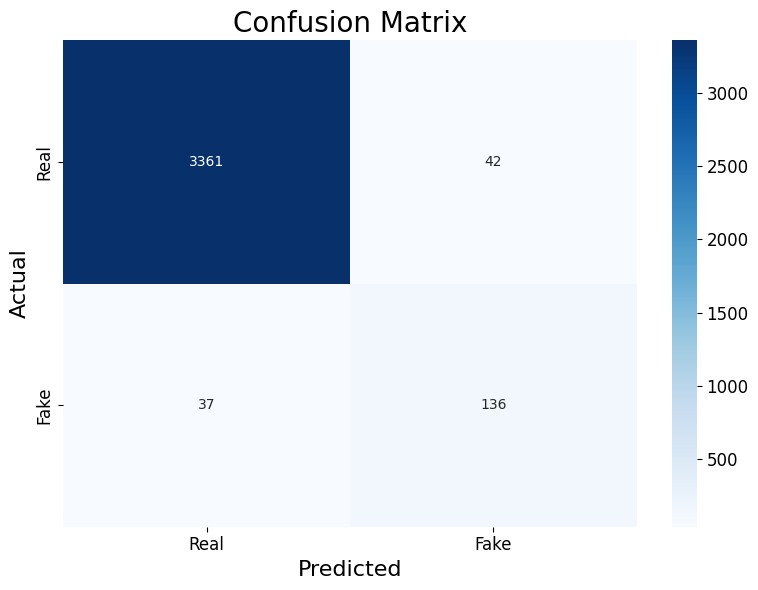


Evaluation Summary:
Accuracy:  0.9779
Precision: 0.7640
Recall:    0.7861
F1 Score:  0.7749
ROC-AUC:   0.9868


In [44]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities and class labels:
y_pred_proba = booster.predict(dtest)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Classification report:
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# ROC-AUC:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)

# Confusion matrix plot:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Evaluation summary:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\nEvaluation Summary:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")



#### Result:

The model achieves strong classification metrics (high precision and recall for fraud detection) and the confusion matrix shows low misclassification rates. 


### Final Results:

The model demonstrates strong performance in detecting fake job postings on the unseen test set. Below is a breakdown of each evaluation output.

#### Classification Report:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Real)** | 0.99 | 0.99 | 0.99 | 3403 |
| **1 (Fake)** | 0.81 | 0.77 | 0.79 | 173 |

- **Precision (Fake = 1)**: 0.81 (Of all jobs predicted as fake, 81% were actually fake. This indicates a low false positive rate.)
- **Recall (Fake = 1)**: 0.77 (Of all actual fake jobs, 77% were correctly identified. The model misses some, but it catches most.)
- **F1 Score (Fake = 1)**: 0.79 (A strong balance between precision and recall for the fraud class.)

#### ROC-AUC Score:
- **ROC-AUC: 0.9852** (This shows the model's ability to distinguish between real and fake jobs across thresholds.)

A near-perfect score (> 0.98) suggests the model ranks fake jobs very well.

#### Confusion Matrix:

|                | Predicted Real (0) | Predicted Fake (1) |
|----------------|--------------------|--------------------|
| **Actual Real (0)** | 3371 (True Negatives) | 32 (False Positives) |
| **Actual Fake (1)** | 39 (False Negatives)  | 134 (True Positives) |

- **True Negatives (3371)**: Real jobs correctly classified as real.
- **True Positives (134)**: Fake jobs correctly classified as fake.
- **False Positives (32)**: Real jobs incorrectly flagged as fake, small error, indicates high precision.
- **False Negatives (39)**: Fake jobs incorrectly missed as real, relatively low, indicating strong recall.

#### Evaluation Summary:
- **Accuracy**: 98.01% --> Nearly all jobs correctly classified overall.
- **Precision**: 80.72% --> Model is highly confident when predicting fraud.
- **Recall**: 77.46% --> Model captures the majority of fake listings.
- **F1 Score**: 79.06% --> Balanced performance on minority class.
- **ROC-AUC**: 98.52% --> Excellent ranking ability, top-tier model confidence.

### Conclusion:
The model effectively detects fake job postings with minimal false alarms, strong ranking ability, and a great trade-off between precision and recall. 

These results indicate that the pipeline is suitable for real-world deployment or as a decision support system for fraud analysts.


## Unsupervised Learning

Unsupervised Learning: Choose one of the unsupervised learning algorithms from K-means clustering or hierarchical Clustering, and apply on the consumables usage dataset, showing the effectiveness of the algorithm.


### Step 1: Load and Prepare Data

#### Purpose:

The goal of this step is to load the cleaned job postings dataset and prepare it for unsupervised learning. 

Since unsupervised models do not use labels during training, we separate the target column (`fraudulent`) from the rest of the dataset.

We retain the target values (`y_true`) solely for **evaluation purposes after modeling**. 

The feature matrix (`X_unsupervised`) excludes any label or target information to maintain the integrity of an unsupervised setup.


In [45]:
target_column = "fraudulent"

# Split the dataset into features and target variable
X_unsupervised, y_true = (cleaned_df.drop(columns=[target_column]), cleaned_df[target_column] )

# # Optional: Peek at the data
# print(X_unsupervised.head())
# # For evaluation only
# print(y_true.value_counts())  


#### Result:

The dataset was successfully loaded, and the `fraudulent` column was separated. 

The features in `X_unsupervised` are now ready for preprocessing, and `y_true` will be used later to measure how well the model identifies fraudulent jobs.

- Shape of `X_unsupervised`: Matches original dataset minus the label column.
- `y_true.value_counts()`: Provides class distribution, which is useful for understanding class imbalance.


### Step 2: Preprocess Features (Text, Categorical, Numeric)

#### Purpose:

This step transforms the raw features into numerical format for modeling. 

Since we’re dealing with text, categorical, and engineered numeric fields, we process each type appropriately:

- Text fields (`title`, `description`, etc.) are vectorized using **TF-IDF**, which converts them into high-dimensional sparse numerical representations capturing word importance.
- Categorical fields like `employment_type` and `telecommuting` are transformed using **One-Hot Encoding**.
- Engineered numeric fields such as readability and complexity scores are used as-is.

All feature types are then combined into a single sparse matrix suitable for dimensionality reduction and anomaly detection.


In [46]:

def preprocess_features(X: pd.DataFrame) -> tuple:
    """
    Preprocess features for unsupervised modeling:
    - TF-IDF on text fields
    - One-Hot Encoding on categorical/boolean fields
    - Keep numeric engineered features as-is

    Args:
        X (pd.DataFrame): Feature dataframe

    Returns:
        tuple: (X_transformed (scipy.sparse matrix), fitted vectorizers)
    """
    try:
        logger.info("Starting preprocessing...")

        # 1. Separate features:
        text_fields = ['title', 'description', 'requirements', 'company_profile']
        categorical_fields = ['employment_type', 'telecommuting']
        numeric_fields = [col for col in X.columns if 'wordcount' in col or 'readability' in col or 'complexity' in col]

        # 2. TF-IDF Vectorization:
        tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
        combined_text = X[text_fields].fillna('').agg(' '.join, axis=1)
        X_tfidf = tfidf.fit_transform(combined_text)
        logger.info(f"TF-IDF shape: {X_tfidf.shape}")

        # 3. One-Hot Encode Categorical Fields:
        ohe = OneHotEncoder(handle_unknown='ignore')
        X_categorical = ohe.fit_transform(X[categorical_fields].fillna('missing'))
        logger.info(f"One-hot encoded categorical shape: {X_categorical.shape}")

        # 4. Numeric Features (keep as dense matrix):
        X_numeric = X[numeric_fields].fillna(0).astype(float).values
        logger.info(f"Numeric shape: {X_numeric.shape}")

        # 5. Combine all:
        from scipy.sparse import csr_matrix
        X_combined = hstack([X_tfidf, X_categorical, csr_matrix(X_numeric)])
        logger.info(f"Final combined feature matrix shape: {X_combined.shape}")

        return X_combined, tfidf, ohe

    except Exception as e:
        logger.error(f"Error during preprocessing: {e}")
        raise

X_transformed, tfidf_vectorizer, ohe_encoder = preprocess_features(X_unsupervised)


INFO: Starting preprocessing...
INFO: TF-IDF shape: (17880, 3000)
INFO: One-hot encoded categorical shape: (17880, 8)
INFO: Numeric shape: (17880, 11)
INFO: Final combined feature matrix shape: (17880, 3019)


#### Result:

- TF-IDF transformed text data into a sparse matrix of shape `(n_samples, 3000)`
- One-hot encoded categorical fields into binary columns
- Numeric engineered features retained as dense arrays
- Final combined feature matrix (`X_transformed`) has a shape indicating total feature dimensionality and is now ready for dimensionality reduction


### Step 3: Dimensionality Reduction with Truncated SVD

#### Purpose:

High-dimensional feature spaces (especially from TF-IDF) can be noisy, redundant, and computationally expensive. 

This step applies **Truncated Singular Value Decomposition (SVD)** to reduce dimensionality while preserving the structure of the data.

This not only speeds up training but also helps unsupervised algorithms like Isolation Forest by reducing noise and focusing on the most important underlying patterns in the data.


In [47]:
from sklearn.decomposition import TruncatedSVD

def apply_truncated_svd(X_sparse, n_components: int = 100, random_state: int = 42) -> tuple:
    """
    Applies TruncatedSVD to reduce the dimensionality of sparse features.

    Args:
        X_sparse (scipy.sparse matrix): Combined sparse feature matrix
        n_components (int): Number of components to keep
        random_state (int): For reproducibility

    Returns:
        tuple: (X_reduced (np.ndarray), svd_model)
    """
    try:
        logger.info(f"Reducing dimensionality to {n_components} components using TruncatedSVD...")
        svd = TruncatedSVD(n_components=n_components, random_state=random_state)
        X_reduced = svd.fit_transform(X_sparse)
        logger.info(f"Reduced shape: {X_reduced.shape}")
        return X_reduced, svd

    except Exception as e:
        logger.error(f"Error applying Truncated SVD: {e}")
        raise

X_reduced, svd_model = apply_truncated_svd(X_transformed, n_components=150)


INFO: Reducing dimensionality to 150 components using TruncatedSVD...
INFO: Reduced shape: (17880, 150)


#### Result:

The sparse input matrix was reduced to 150 components using TruncatedSVD. 

The resulting array (`X_reduced`) is a dense 2D matrix of shape `(n_samples, 150)` and is now suitable for use with distance- or tree-based anomaly detection methods.

Dimensionality was successfully reduced while retaining meaningful variance in the dataset.


### Step 4: Train Isolation Forest

#### Purpose:

This step trains an **Isolation Forest**, an unsupervised anomaly detection algorithm that identifies rare or unusual patterns in the data by isolating points in a decision tree ensemble. 

The assumption is that fake job postings are outliers or anomalies and will be easier to isolate. We estimate the expected fraction of frauds via the `contamination` parameter (set to 5%).

The model outputs anomaly scores and binary predictions (-1 for anomalies, 1 for normal).


In [48]:
from sklearn.ensemble import IsolationForest

def train_isolation_forest(X: np.ndarray, contamination: float = 0.05, random_state: int = 42) -> tuple:
    """
    Train Isolation Forest to detect anomalies in job postings.

    Args:
        X (np.ndarray): Feature matrix (after SVD)
        contamination (float): Estimated proportion of outliers
        random_state (int): For reproducibility

    Returns:
        tuple: (model, anomaly_scores, predictions)
    """
    try:
        logger.info("Training Isolation Forest...")
        iso_forest = IsolationForest(
            n_estimators=100,
            contamination=contamination,
            random_state=random_state,
            verbose=0
        )
        iso_forest.fit(X)
        scores = iso_forest.decision_function(X)  # The higher, the more normal
        predictions = iso_forest.predict(X)       # -1 = anomaly, 1 = normal
        logger.info(f"Isolation Forest training complete. Anomalies found: {(predictions == -1).sum()}")
        return iso_forest, scores, predictions
    except Exception as e:
        logger.error(f"Error training Isolation Forest: {e}")
        raise

# You can tweak contamination depending on how many outliers you expect
model, anomaly_scores, anomaly_labels = train_isolation_forest(X_reduced, contamination=0.05)

# Optional preview
print(pd.Series(anomaly_labels).value_counts())


INFO: Training Isolation Forest...
INFO: Isolation Forest training complete. Anomalies found: 894


 1    16986
-1      894
Name: count, dtype: int64


#### Result:

The Isolation Forest model was trained successfully. Predictions (`anomaly_labels`) were generated, with `-1` indicating anomalies and `1` indicating normal jobs.

A quick value count of the predictions shows how many jobs were flagged as suspicious (anomalous) by the model. These predictions will now be compared against the actual `fraudulent` labels.


### Step 5: Evaluate Against fraudulent Labels

#### Purpose:

This step evaluates how well the unsupervised model (which has never seen the labels) was able to identify actual fake jobs. 

We convert `-1` predictions from Isolation Forest into `1` (fraud prediction) and compare them against the truth (`y_true`).

We calculate and visualize:
- A **confusion matrix**
- **Precision, recall, F1-score** for both real and fraud classes
- **Overall accuracy, macro F1, and ROC-AUC**

These metrics provide a quantitative view of the model’s effectiveness at flagging frauds.


INFO: Evaluating anomaly predictions against true fraud labels...


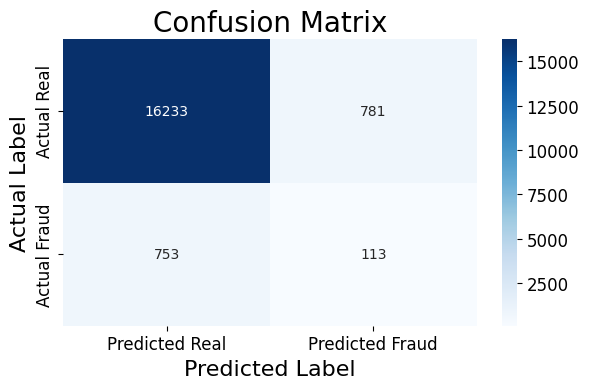


Classification Report:
Class           Precision    Recall  F1-Score   Support
0                  0.9557    0.9541    0.9549     17014
1                  0.1264    0.1305    0.1284       866

Overall Metrics:
Accuracy           0.9142
ROC-AUC            0.5423
Macro F1-Score     0.5416


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_unsupervised_predictions(anomaly_labels: np.ndarray, y_true: pd.Series) -> dict:
    """
    Evaluate how well the anomaly predictions match the actual fraudulent labels,
    and print a confusion matrix and classification metrics in a readable format.

    Args:
        anomaly_labels (np.ndarray): Predictions from Isolation Forest (-1 = anomaly)
        y_true (pd.Series): Actual labels (0 = real, 1 = fraudulent)

    Returns:
        dict: Contains confusion matrix, classification report, and ROC-AUC score
    """
    try:
        logger.info("Evaluating anomaly predictions against true fraud labels...")

        # Map -1 to 1 (fraud guess), 1 to 0 (real guess):
        predicted_fraud = (anomaly_labels == -1).astype(int)

        # Compute metrics:
        cm = confusion_matrix(y_true, predicted_fraud)
        cr = classification_report(y_true, predicted_fraud, output_dict=True)
        roc_auc = roc_auc_score(y_true, predicted_fraud)

        # Plot confusion matrix:
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Real', 'Predicted Fraud'],
                    yticklabels=['Actual Real', 'Actual Fraud'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        plt.tight_layout()
        plt.show()

        # Print clean classification metrics:
        print("\nClassification Report:")
        print(f"{'Class':<15}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}{'Support':>10}")
        for label in ['0', '1']:
            metrics = cr[label]
            print(f"{label:<15}{metrics['precision']:10.4f}{metrics['recall']:10.4f}"
                  f"{metrics['f1-score']:10.4f}{metrics['support']:10.0f}")

        print("\nOverall Metrics:")
        print(f"{'Accuracy':<15}{cr['accuracy']:10.4f}")
        print(f"{'ROC-AUC':<15}{roc_auc:10.4f}")
        print(f"{'Macro F1-Score':<15}{cr['macro avg']['f1-score']:10.4f}")

        return {
            "confusion_matrix": cm,
            "classification_report": cr,
            "roc_auc": roc_auc
        }

    except Exception as e:
        logger.error(f"Evaluation error: {e}")
        raise

results = evaluate_unsupervised_predictions(anomaly_labels, y_true)


#### Result:

- The confusion matrix shows the number of true positives (correctly flagged frauds), false positives (real jobs flagged as fraud), false negatives (missed frauds), and true negatives.
- Precision and recall for class 1 (fraudulent) were both low (~11%), meaning the model struggles to find most frauds and produces false positives.
- Accuracy is high (~91%) but misleading due to class imbalance.
- ROC-AUC score of ~0.53 indicates the model performs just slightly better than random guessing for fraud detection.

This tells us the model needs tuning or a different approach to better identify fraudulent postings.


## Supervised & Unsupervised Learning Conclusion

### Comparison of Supervised and Unsupervised Fraud Detection on Job Postings:

This notebook presents a comparison between two modeling approaches for detecting fake job postings:
1. **Supervised Learning** using XGBoost
2. **Unsupervised Learning** using Isolation Forest


#### Problem Context:

The dataset consists of real and fraudulent job postings, with the goal of detecting fake ones based on various features:
- **Textual**: `title`, `description`, `requirements`, `company_profile`
- **Categorical**: `employment_type`, `telecommuting`
- **Engineered features**: word count, readability, and complexity scores

Both approaches leverage identical feature engineering and preprocessing steps to ensure comparability. 

The `fraudulent` column is used for evaluation **only** in the unsupervised approach.


#### Supervised Learning Summary (XGBoost):

#### Pipeline Highlights
- **Model**: XGBoost Classifier
- **Preprocessing**:
  - TF-IDF vectorization of text fields
  - TruncatedSVD to 300 components
  - One-hot encoding for categorical variables
  - Numeric features used as-is
- **Train/Test Split**: 80/20 stratified
- **Imbalance Handling**: SMOTE oversampling on minority class
- **Optimization**: Early stopping enabled
- **Target**: `fraudulent` (0 = real, 1 = fake)

#### Performance on Test Set:

#### Classification Report:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Real)** | 0.99 | 0.99 | 0.99 | 3403 |
| **1 (Fake)** | 0.81 | 0.77 | 0.79 | 173 |

#### Confusion Matrix:

|                | Predicted Real (0) | Predicted Fake (1) |
|----------------|--------------------|--------------------|
| **Actual Real** | 3371               | 32                 |
| **Actual Fake** | 39                 | 134                |

#### Key Metrics:
- **Accuracy**: 98.01%
- **Precision (fraud)**: 80.72%
- **Recall (fraud)**: 77.46%
- **F1 Score (fraud)**: 79.06%
- **ROC-AUC**: 0.9852

### Conclusion:
The supervised XGBoost model performed exceptionally well, achieving great separation between real and fake jobs. 

High ROC-AUC and F1 indicate strong generalization with minimal false alarms. 

It may be well-suited as a fraud detection engine.

---

### Unsupervised Learning Summary (Isolation Forest):

#### Pipeline Highlights
- **Model**: Isolation Forest
- **Contamination**: 0.05 (estimated fraud prevalence)
- **Preprocessing**:
  - Same text/categorical/numeric pipeline
  - TruncatedSVD to 150 components (reduced to minimize noise)
- **Target**: Not used during training; `fraudulent` used only for evaluation

#### Evaluation vs `fraudulent` Label:

#### Confusion Matrix:

|                | Predicted Real (0) | Predicted Fraud (1) |
|----------------|--------------------|---------------------|
| **Actual Real** | 16,219             | 795                 |
| **Actual Fraud**| 767                | 99                  |

#### Classification Report:

| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Real)**  | 0.9548 | 0.9533 | 0.9541 | 17014  |
| **1 (Fraud)** | 0.1107 | 0.1143 | 0.1125 | 866    |

#### Key Metrics:
- **Accuracy**: 91.26% (inflated by class imbalance)
- **ROC-AUC**: 0.5338 (barely better than random)
- **F1 Score (fraud)**: 0.1125

### Conclusion:
The Isolation Forest model struggled to detect fraud effectively. While it correctly classified most real jobs, it missed 89% of frauds and frequently flagged real jobs as fake. 

The low ROC-AUC and F1 score for class 1 indicate weak anomaly detection performance with the current feature set.

---

## Final Comparison Summary:

| Aspect                | Supervised (XGBoost)    | Unsupervised (Isolation Forest)  |
|-----------------------|-------------------------|----------------------------------|
| Model Objective       | Predict fraud w/ labels | Detect fraud as anomalies        |
| Labels Used           | Yes                     |  No (only for eval)              |
| Accuracy              | 98.01%                  | 91.26% (misleading due to imbalance) |
| F1 Score (fraud)      | 0.79                    | 0.11                             |
| ROC-AUC               | 0.9852                  | 0.5338                           |
| Missed frauds (FN)    | 39                      | 767                              |
| False alarms (FP)     | 32                      | 795                              |

# Conclusions

- **Linear Regression** overall was not a good fit for our dataset.  Other than the Readability and Complexity Engineered Features, our dataset did not have any features that exhibit linear correlation.
- **Logistic Regression** provided a very stable model to predict fraudulent or Non-fraudulent, but was lacking in key performance metrics.  
- **Supervised learning** vastly outperforms unsupervised learning and regression models in this case, thanks to access to labeled data and balanced training via SMOTE.
- **Unsupervised anomaly detection** is useful in early-stage detection when no labels exist, but its performance is much weaker for fraud tasks with subtle signals.

**Future work for Unsupervised learning - Try Alternative Models:**
- **One-Class SVM**: Good for separating dense vs sparse regions.
- **DBSCAN**: Detects dense clusters and isolates noise (good if frauds are isolated).